#Import Libraries

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import tensorflow as tf

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder

#Data Preprocessing

##1. Read and understand data

In [ ]:
df= pd.read_excel("/content/sample_data.xlsx")

In [ ]:
df_copy=df.copy()

In [ ]:
df.head()

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad Flag
0,contract_25103,26102,2019-02-18,2024-10-01,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,56.992272,Aran,Aran,0
1,contract_178508,179507,2019-08-09,2022-09-08,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,34.938431,Lankaran,Lankaran,0
2,contract_44173,45172,2019-08-14,2024-10-07,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,35.965146,Baku,Baku,0
3,contract_110572,111571,2019-06-25,2022-06-25,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,23.953948,Baku,Baku,0
4,contract_44085,45084,2019-06-13,2023-06-13,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,29.999247,Aran,Aran,0


In [ ]:
df. columns = df. columns. str. replace(' ','_')

In [ ]:
df.columns

Index(['CONTRACT_NO', 'CUSTOMER_NO', 'START_DATE', 'DATE_OF_LOAN_MATURITY',
       'PRODUCT', 'tenure', 'INITIAL_AMOUNT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Avg_salary', 'age',
       'Region_Location', 'Loan_location_group', 'Bad_Flag'],
      dtype='object')

In [ ]:
df.dtypes

CONTRACT_NO                      object
CUSTOMER_NO                       int64
START_DATE               datetime64[ns]
DATE_OF_LOAN_MATURITY    datetime64[ns]
PRODUCT                          object
tenure                          float64
INITIAL_AMOUNT                  float64
mobile_name                      object
CUSTOMER_CITY                    object
gender                           object
Ministry                         object
Position                         object
Avg_salary                      float64
age                             float64
Region_Location                  object
Loan_location_group              object
Bad_Flag                          int64
dtype: object

In [ ]:
object_types = df.select_dtypes(include=['object','category'])
object_types

,CONTRACT_NO,PRODUCT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Region_Location,Loan_location_group
0,contract_25103,BIRKART,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,Aran,Aran
1,contract_178508,GTK,Unknown,Masallı,M,Ministry of Education,Teacher,Lankaran,Lankaran
2,contract_44173,BIRKART,Xiaomi,Bakı,M,Ministry of Emergency,Other,Baku,Baku
3,contract_110572,GTK,Iphone,Bakı,F,Government's committees,Other,Baku,Baku
4,contract_44085,GTK,Xiaomi,Salyan,M,Executive Authority,Economist,Aran,Aran
...,...,...,...,...,...,...,...,...,...
29995,contract_33007,GTK,Xiaomi,Astara,F,Executive Authority,Technision,Lankaran,Lankaran
29996,contract_173631,GTK,Xiaomi,Tərtər,F,Other Ministries,Technision,Yukhari Qarabag,Baku
29997,contract_61236,GTK,Unknown,Zərdab,M,OJSC or CJSC Government's Companies,Technision,Aran,Aran
29998,contract_209538,GTK,Xiaomi,Şəmkir,M,Ministry of Forces,Gizir\MAXE,Ganja-Qazakh,Ganja-Qazakh


We will encode categorical features later, but from the first sight, we can see some features have categorical values, and their dtype in object. So, we don't need to change them and we can get insights from them in next steps.

In [ ]:
#Description about dataset
df.describe()

,CUSTOMER_NO,tenure,INITIAL_AMOUNT,Avg_salary,age,Bad_Flag
count,30000.000000,29966.000000,30000.000000,29510.000000,29688.000000,30000.000000
mean,88636.981433,41.472502,3353.209711,569.062253,39.577453,0.074467
std,59218.822811,16.735214,2683.267015,1035.567253,11.534876,0.262533
min,1005.000000,0.000000,310.000000,69.000000,18.026380,0.000000
25%,37618.250000,36.000000,1500.000000,275.500000,29.908212,0.000000
50%,80016.000000,36.000000,2600.000000,437.420000,37.746155,0.000000
75%,135012.250000,60.000000,4200.000000,677.047500,49.101624,0.000000
max,215188.000000,60.000000,20000.000000,100000.000000,68.803603,1.000000


In our dataset, average salary is spread between 69 to 100000, with an average of 569 and Std Dev of 1035 & initial amount between 310 to 20000, with an average of 3353 and Std Dev of 2683. It seems we should be careful while working with these features because of outliers. We will mention it again in outlier removing step.

In [ ]:
#Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CONTRACT_NO            30000 non-null  object        
 1   CUSTOMER_NO            30000 non-null  int64         
 2   START_DATE             30000 non-null  datetime64[ns]
 3   DATE_OF_LOAN_MATURITY  29966 non-null  datetime64[ns]
 4   PRODUCT                30000 non-null  object        
 5   tenure                 29966 non-null  float64       
 6   INITIAL_AMOUNT         30000 non-null  float64       
 7   mobile_name            30000 non-null  object        
 8   CUSTOMER_CITY          29808 non-null  object        
 9   gender                 29445 non-null  object        
 10  Ministry               29522 non-null  object        
 11  Position               30000 non-null  object        
 12  Avg_salary             29510 non-null  float64       
 13  a

In [ ]:
#Looking into shape of data to find out number of rows and columns
df.shape

(30000, 17)

In [ ]:
df['Bad_Flag'].value_counts()

0    27766
1     2234
Name: Bad_Flag, dtype: int64

Seems like our data is imbalanced. We will deal with this later

##2.1. Feature engineering and Feature selection

In [ ]:
df.head()

,CONTRACT_NO,CUSTOMER_NO,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag
0,contract_25103,26102,2019-02-18,2024-10-01,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,56.992272,Aran,Aran,0
1,contract_178508,179507,2019-08-09,2022-09-08,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,34.938431,Lankaran,Lankaran,0
2,contract_44173,45172,2019-08-14,2024-10-07,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,35.965146,Baku,Baku,0
3,contract_110572,111571,2019-06-25,2022-06-25,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,23.953948,Baku,Baku,0
4,contract_44085,45084,2019-06-13,2023-06-13,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,29.999247,Aran,Aran,0


Let's create a credit years column to analyse how the term of credit loan affects defaulted payment

In [ ]:
df['year_start'] = df['START_DATE'].dt.year

In [ ]:
df['year_maturity'] = df['DATE_OF_LOAN_MATURITY'].dt.year

In [ ]:
df['Credit_years']=df['year_maturity']- df['year_start']

In [ ]:
#Now we can drop new features except credit years, since they are not gonna improve our model
df.drop(['year_start','year_maturity'], axis=1,inplace=True)

In [ ]:
#Dropping columns not only helps the model in learning better but also speeds it up, thus making it more efficient.
df=df.drop(['CONTRACT_NO','CUSTOMER_NO'],axis=1)

Columns that have a single value are probably useless for modeling. These columns are referred to zero-variance predictors, so we dont need to use them anymore.

In [ ]:
values = df.nunique()
single_value_cols = [values.index[i] for i,v in enumerate(values) if v == 1]
single_value_cols

[]

In [ ]:
#Seems like we don't have such columns
df.drop(single_value_cols, axis=1, inplace=True)

In [ ]:
df.head()

,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag,Credit_years
0,2019-02-18,2024-10-01,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,56.992272,Aran,Aran,0,5.0
1,2019-08-09,2022-09-08,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,34.938431,Lankaran,Lankaran,0,3.0
2,2019-08-14,2024-10-07,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,35.965146,Baku,Baku,0,5.0
3,2019-06-25,2022-06-25,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,23.953948,Baku,Baku,0,3.0
4,2019-06-13,2023-06-13,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,29.999247,Aran,Aran,0,4.0


In [ ]:
df.dtypes

START_DATE               datetime64[ns]
DATE_OF_LOAN_MATURITY    datetime64[ns]
PRODUCT                          object
tenure                          float64
INITIAL_AMOUNT                  float64
mobile_name                      object
CUSTOMER_CITY                    object
gender                           object
Ministry                         object
Position                         object
Avg_salary                      float64
age                             float64
Region_Location                  object
Loan_location_group              object
Bad_Flag                          int64
Credit_years                    float64
dtype: object

##2.2.Correlation matrix

In [ ]:
train_corr  = df.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,tenure,INITIAL_AMOUNT,Avg_salary,age,Bad_Flag,Credit_years
tenure,1.00,0.12,0.00,0.07,0.03,0.99
INITIAL_AMOUNT,0.12,1.00,0.20,0.05,0.03,0.12
Avg_salary,0.00,0.20,1.00,0.06,0.01,0.00
age,0.07,0.05,0.06,1.00,0.09,0.07
Bad_Flag,0.03,0.03,0.01,0.09,1.00,0.02
Credit_years,0.99,0.12,0.00,0.07,0.02,1.00


In [ ]:
train_corr  = df.corr(method='pearson')
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
lower_tri = train_corr.where(np.tril(np.ones(train_corr.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
to_drop+=(column for column in lower_tri.columns if any(lower_tri[column] < -0.80))
print('Most correlated features: ', to_drop,'\n')

Most correlated features:  ['Credit_years'] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Well, it seems that the column i just created has high multicollinearity, i will drop this but probably gonna need to create it again during the EDA step for further analysis.

In [ ]:
df=df.drop(columns='Credit_years')

In [ ]:
df.shape

(30000, 15)

I want to mention one important thing that doing correlation matrix check doesn't mean that we have checked and deleted all the columns that have multicollinearity. Collinearity can also occur between 3 variables or more, so the correlation matrix cannot be used to detect all cases of multicollinearity.

And this is when vif comes into the picture. I will check VIF after encoding my categorical variables.

##3. Checking duplicate rows

Duplicates are an extreme case of nonrandom sampling, and they bias our fitted model. Including them will essentially lead to the model overfitting this subset of points. So that's why i will check and remove duplicate rows.

In [ ]:
dups = df.duplicated()
print(dups.any())

True


In [ ]:
df.shape

(30000, 15)

Pandas duplicated() returns a boolean Series. However, it is not practical to see a list of True and False when we need to perform some data analysis.

We can Pandas loc data selector to extract those duplicate rows:

In [ ]:
# Extract duplicate rows
df.loc[df.duplicated(), :]

,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag
1234,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
5952,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
9589,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
10474,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
10853,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
12566,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
13440,2019-02-07,2024-01-17,BIRKART,60.0,1000.0,Unknown,Şəki,M,Ministry of Education,Teacher,518.87,63.861681,Shaki-Zagatala,Shaki-Zagatala,0
17563,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0
22756,2019-11-07,2021-07-11,GTK,24.0,2000.0,Samsung,Babək,F,Ministry of Education,Teacher,394.30,42.822586,Baku,Nakhchivan,0
23067,2019-02-07,2024-01-17,BIRKART,60.0,6900.0,Samsung,Masallı,M,Ministry of Internal Affair,Other,1161.42,35.204008,Lankaran,Lankaran,0


loc can take a boolean Series and filter data based on True and False. The first argument df.duplicated() will find the rows that were identified by duplicated(). The second argument : will display all columns.

In [ ]:
df.drop_duplicates(inplace=True,keep='last')

By default, this method returns a new DataFrame with duplicate rows removed. We can set the argumentinplace=True to remove duplicates from the original DataFrame.

There is an argument keep in Pandas duplicated() to determine which duplicates to mark. keep defaults to 'first', which means the first occurrence gets kept, and all others get identified as duplicates.

We can change it to 'last' keep the last occurrence and mark all others as duplicates. I prefer to use 'last'.

In [ ]:
# Extract duplicate rows
df.loc[df.duplicated(), :]

,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag


In [ ]:
df.shape

(29985, 15)

Our data is clean from duplicate rows!

##4. Train-Test split

I usually prefer doing train-test split before imputation and some other preprocessing methods to avoid data leakage problem. In other case, information would be revealed to the model that would give it an unrealistic advantage to make better predictions. So here it comes:

In [ ]:
df.head()

,START_DATE,DATE_OF_LOAN_MATURITY,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag
0,2019-02-18,2024-10-01,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,56.992272,Aran,Aran,0
1,2019-08-09,2022-09-08,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,34.938431,Lankaran,Lankaran,0
2,2019-08-14,2024-10-07,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,35.965146,Baku,Baku,0
3,2019-06-25,2022-06-25,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,23.953948,Baku,Baku,0
4,2019-06-13,2023-06-13,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,29.999247,Aran,Aran,0


In [ ]:
X = df.drop(["Bad_Flag"],axis=1)
y = df.loc[:,'Bad_Flag']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [ ]:
print(f'X train shape is: {X_train.shape}')
print(f'X test shape is: {X_test.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'y test shape is: {y_test.shape}')

X train shape is: (23988, 14)
X test shape is: (5997, 14)
y train shape is: (23988,)
y test shape is: (5997,)


In [ ]:
X_train.drop(['START_DATE','DATE_OF_LOAN_MATURITY'], axis=1,inplace=True)
X_test.drop(['START_DATE','DATE_OF_LOAN_MATURITY'], axis=1,inplace=True)

##5. Dealing with null values

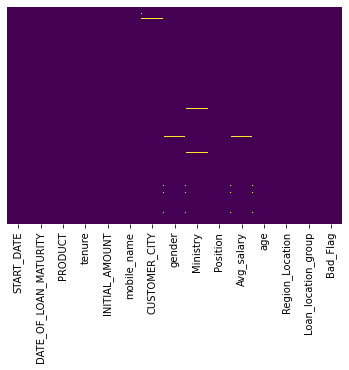

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [ ]:
#Find out the percentage of missing values in each column in the given dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
START_DATE,START_DATE,0.000000
DATE_OF_LOAN_MATURITY,DATE_OF_LOAN_MATURITY,0.113390
PRODUCT,PRODUCT,0.000000
tenure,tenure,0.113390
INITIAL_AMOUNT,INITIAL_AMOUNT,0.000000
mobile_name,mobile_name,0.000000
CUSTOMER_CITY,CUSTOMER_CITY,0.640320
gender,gender,1.850925
Ministry,Ministry,1.594130
Position,Position,0.000000


In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

gender                   555
Avg_salary               490
Ministry                 478
age                      312
CUSTOMER_CITY            192
DATE_OF_LOAN_MATURITY     34
tenure                    34
START_DATE                 0
PRODUCT                    0
INITIAL_AMOUNT             0
dtype: int64

In [ ]:
X_train['gender'].value_counts()

M    13340
F    10229
Name: gender, dtype: int64

In [ ]:
#we can use this method
#df['gender']=df['gender'].fillna('M')
#or

In [ ]:
## For the missing values in the gender column, replace it with mode (value that appears most often)-Train set
X_train['gender'].fillna(X_train.gender.mode().to_string(), inplace=True)

In [ ]:
## For the missing values in the gender column, replace it with mode (value that appears most often)-Test set
X_test['gender'].fillna(X_train.gender.mode().to_string(), inplace=True)

In [ ]:
## for missing Avg_salary value, replace it with rounded mean value-Train set
X_train['Avg_salary'].fillna(round(X_train.Avg_salary.mean()), inplace=True)

In [ ]:
## for missing Avg_salary value, replace it with rounded mean value-Test set
X_test['Avg_salary'].fillna(round(X_test.Avg_salary.mean()), inplace=True)

In [ ]:
## For the missing values in the Ministry column, replace it with mode (value that appears most often)-Train set
X_train['Ministry'].fillna(X_train.Ministry.mode().to_string(), inplace=True)

In [ ]:
## For the missing values in the Ministry column, replace it with mode (value that appears most often)-Test set
X_test['Ministry'].fillna(X_test.Ministry.mode().to_string(), inplace=True)

In [ ]:
## for missing age value, replace it with rounded mean value-Train set
X_train['age'].fillna(round(X_train.age.mean()), inplace=True)

In [ ]:
## for missing age value, replace it with rounded mean value-Test set
X_test['age'].fillna(round(X_test.age.mean()), inplace=True)

In [ ]:
## For the missing values in the CUSTOMER_CITY column, replace it with mode (value that appears most often)-Train set
X_train['CUSTOMER_CITY'].fillna(X_train.CUSTOMER_CITY.mode().to_string(), inplace=True)

In [ ]:
## For the missing values in the CUSTOMER_CITY column, replace it with mode (value that appears most often)-Test set
X_test['CUSTOMER_CITY'].fillna(X_test.CUSTOMER_CITY.mode().to_string(), inplace=True)

In [ ]:
## for missing tenure value, replace it with rounded mean value-Train set
X_train['tenure'].fillna(round(X_train.tenure.mean()), inplace=True)

In [ ]:
## for missing tenure value, replace it with rounded mean value-Train set
X_test['tenure'].fillna(round(X_test.tenure.mean()), inplace=True)

In [ ]:
X_train.isnull().sum().sort_values(ascending=False)[:10]

PRODUCT           0
tenure            0
INITIAL_AMOUNT    0
mobile_name       0
CUSTOMER_CITY     0
gender            0
Ministry          0
Position          0
Avg_salary        0
age               0
dtype: int64

In [ ]:
X_test.isnull().sum().sort_values(ascending=False)[:10]

PRODUCT           0
tenure            0
INITIAL_AMOUNT    0
mobile_name       0
CUSTOMER_CITY     0
gender            0
Ministry          0
Position          0
Avg_salary        0
age               0
dtype: int64

Apart from the nulls, the variable 'mobile_name' has a value 'Unknown' so I think i need to change it with its mode value as well

In [ ]:
X_train['mobile_name'].value_counts()

Unknown       9122
Samsung       7447
Xiaomi        4498
Iphone        1525
huawei         843
others         406
Lenovo          44
Nokia           37
Web             20
HTC             18
Sony            17
Motorola         9
Panasonic        1
BlackBerry       1
Name: mobile_name, dtype: int64

In [ ]:
## mobile_name-Train set
X_train['mobile_name'] = X_train['mobile_name'].replace(['Unknown'],['Samsung'])

In [ ]:
## mobile_name-Test set
X_test['mobile_name'] = X_test['mobile_name'].replace(['Unknown'],['Samsung'])

In [ ]:
X_train['mobile_name'].value_counts()

Samsung       16569
Xiaomi         4498
Iphone         1525
huawei          843
others          406
Lenovo           44
Nokia            37
Web              20
HTC              18
Sony             17
Motorola          9
Panasonic         1
BlackBerry        1
Name: mobile_name, dtype: int64

In [ ]:
X_train.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,GTK,36.0,3200.0,Samsung,Füzuli,F,Ministry of health,Nurse,287.33,29.134068,Aran,Aran
17568,BIRKART,60.0,2300.0,Samsung,Bakı,M,Other Ministries,Guard,509.10,29.347625,Baku,Baku
619,BIRKART,60.0,2000.0,Samsung,İsmayıllı,F,Ministry of Education,Teacher,553.76,46.018741,Daqlig Shirvan,Daqlig Shirvan
17094,GTK,48.0,9350.0,Samsung,Laçın,M,Ministry of Internal Affair,Police,1010.28,24.014182,Aran,Aran
22597,BIRKART,60.0,3000.0,Iphone,Bakı,F,Ministry of Education,Teacher,811.00,35.316262,Baku,Baku


Our data is cleaned from null values!

Let's now check shapes of our sets to eliminate the possibility of shape error problem on modelling phase

In [ ]:
print(f'X train shape is: {X_train.shape}')
print(f'X test shape is: {X_test.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'y test shape is: {y_test.shape}')

X train shape is: (23988, 12)
X test shape is: (5997, 12)
y train shape is: (23988,)
y test shape is: (5997,)


Datasets are in a right shape

In [ ]:
X_train.dtypes

PRODUCT                 object
tenure                 float64
INITIAL_AMOUNT         float64
mobile_name             object
CUSTOMER_CITY           object
gender                  object
Ministry                object
Position                object
Avg_salary             float64
age                    float64
Region_Location         object
Loan_location_group     object
dtype: object

#Exploratory Data Analysis

##1. Imbalanced data?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


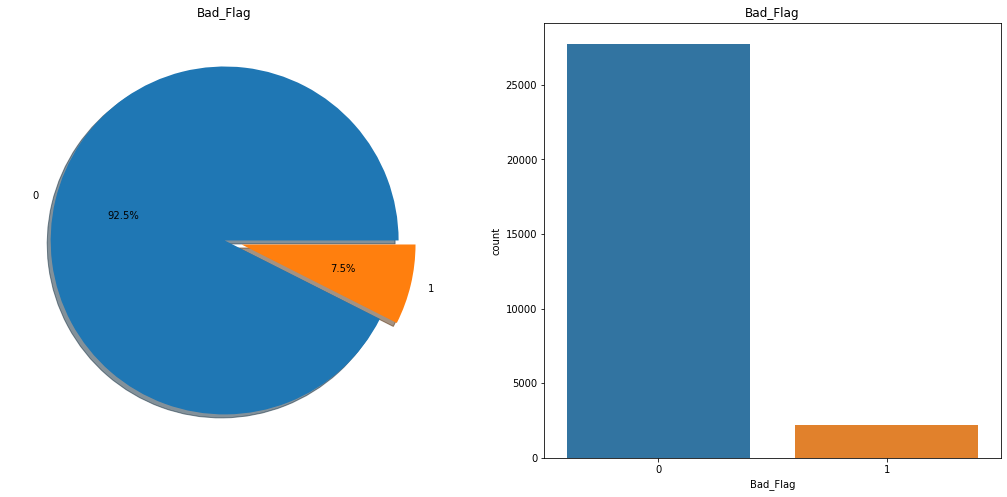

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Bad_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Bad_Flag')
ax[0].set_ylabel('')
sns.countplot('Bad_Flag',data=df,ax=ax[1])
ax[1].set_title('Bad_Flag')
plt.show()

Again, obviously we are working with imbalanced data

Let's now create some plotting functions for further analysis

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):

    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)

    OUTPUT:
        Display the plot
    '''

    sns.set_style('darkgrid')

    fig, ax = plt.subplots(figsize=figsize)

    if x_label != None:
        ax.set_xlabel(x_label)

    if y_label != None:
        ax.set_ylabel(y_label)

    if title != None:
        ax.set_title(title)

    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)


    plt.show()

In [ ]:
def get_count(series, limit=None):

    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''

    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()

    x = series.index
    y = series/series.sum()*100

    return x.values,y.values

##2. Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


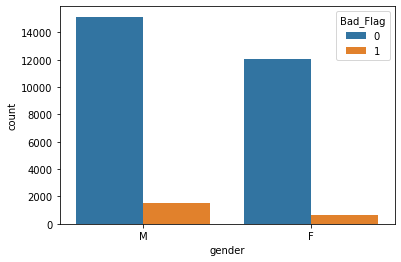

In [ ]:
sns.countplot('gender',hue='Bad_Flag',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


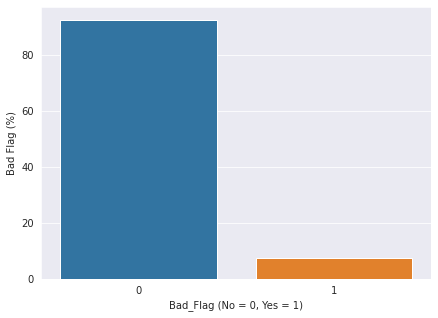

In [ ]:
x,y = get_count(df['Bad_Flag'])
plot(x,y, x_label='Bad_Flag (No = 0, Yes = 1)', y_label='Bad Flag (%)')

For further analysis, let's select only those values which are not bad flag-customers who did not default in payment.

In [ ]:
df_not_bad_flag = df[df['Bad_Flag'] == 0]

In [ ]:
df_bad_flag = df[df['Bad_Flag'] == 1]

##3. Region

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


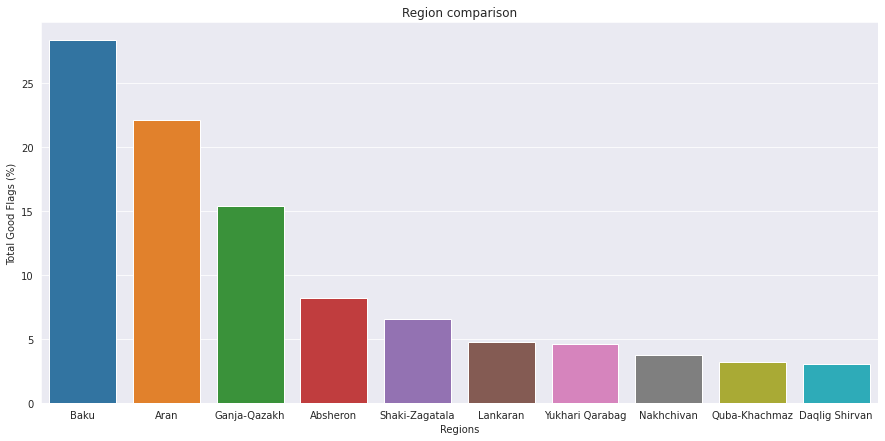

In [ ]:
x,y = get_count(df_not_bad_flag['Region_Location'])
plot(x,y, x_label='Regions', y_label='Total Good Flags (%)', title='Region comparison', figsize=(15,7))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


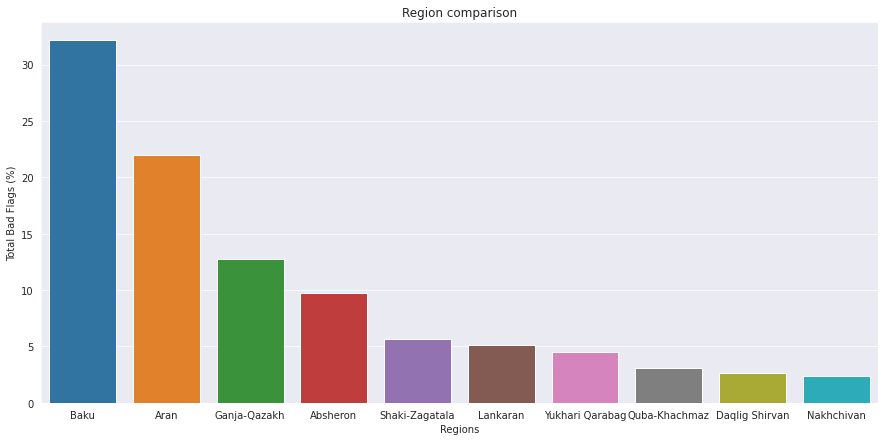

In [ ]:
x,y = get_count(df_bad_flag['Region_Location'])
plot(x,y, x_label='Regions', y_label='Total Bad Flags (%)', title='Region comparison', figsize=(15,7))

Seems like in general region doesn't have a big effect on our target since sorting trend is almost the same in bot bad and good flags.

##4. Credit years

Let's create a credit years column again to analyse how the term of credit loan affects defaulted payment. This action is just for visualization, I will not use this column for modelling since it creates extremely high multicollinearity with tenure as we have seen during the correlation matrix check phase.

In [ ]:
df['year_start'] = df['START_DATE'].dt.year

In [ ]:
df['year_maturity'] = df['DATE_OF_LOAN_MATURITY'].dt.year

In [ ]:
df['Credit_years']=df['year_maturity']- df['year_start']

In [ ]:
#Now we can drop new features except credit years
df.drop(['year_start','year_maturity'], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


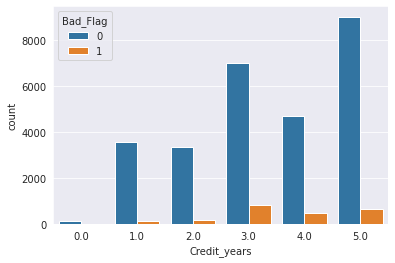

In [ ]:
sns.countplot('Credit_years',hue='Bad_Flag',data=df)
plt.show()

So i would usually say that the more the term of loan the riskier it gets, but 3 year credit loans create exceptions since it is the most risky category with hihest number of bad flags

At the end, I will delete these columns since they are not gonna improve our model as we have seen that Credit years variable has multicollinearity

In [ ]:
df.drop(['Credit_years','START_DATE','DATE_OF_LOAN_MATURITY'], axis=1,inplace=True)

##5. Position

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


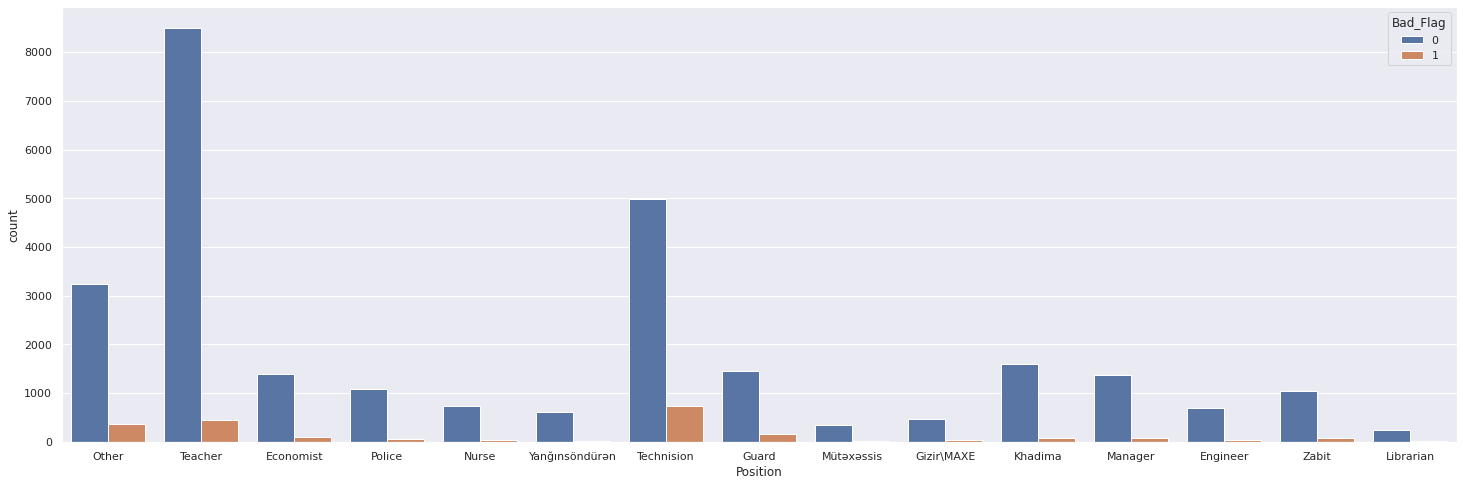

In [ ]:
sns.set(rc = {'figure.figsize':(25,8)})
sns.countplot('Position',hue='Bad_Flag',data=df)
plt.show()

So the most bad flags are of the customers with the profession of 'Teacher', 'technision' and 'Other' categories. But why? Let's EDA!

##6. Average salary by position

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


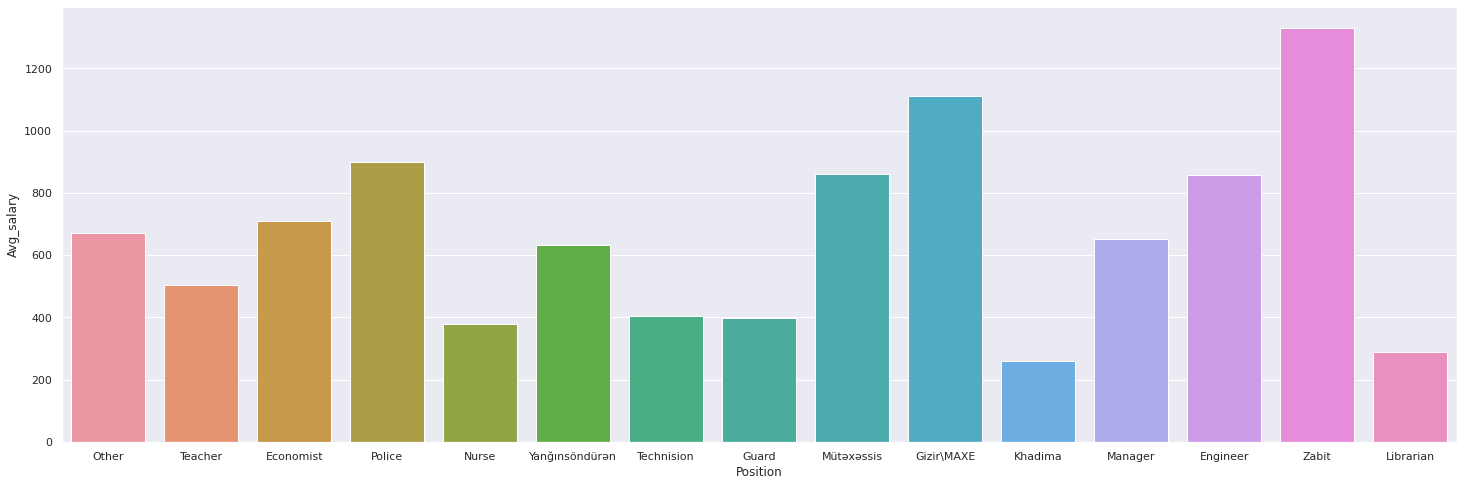

In [ ]:
df.groupby('Position', as_index=False)['Avg_salary'].mean()
p = sns.barplot('Position', 'Avg_salary', data=df, ci=False)

Based on the plot, İ think this is mostly related to their salaries. Zabit, Gizir, Mütəxəssis, Police and Engineer categories have almost zero or near zero bad flags since their average salary is higher. But on the other hand Teachers, Technisions do have lower salaries and hİgher number of bad flags. Khadima and Librarian categories are quite suspicious.

##7. Tenure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


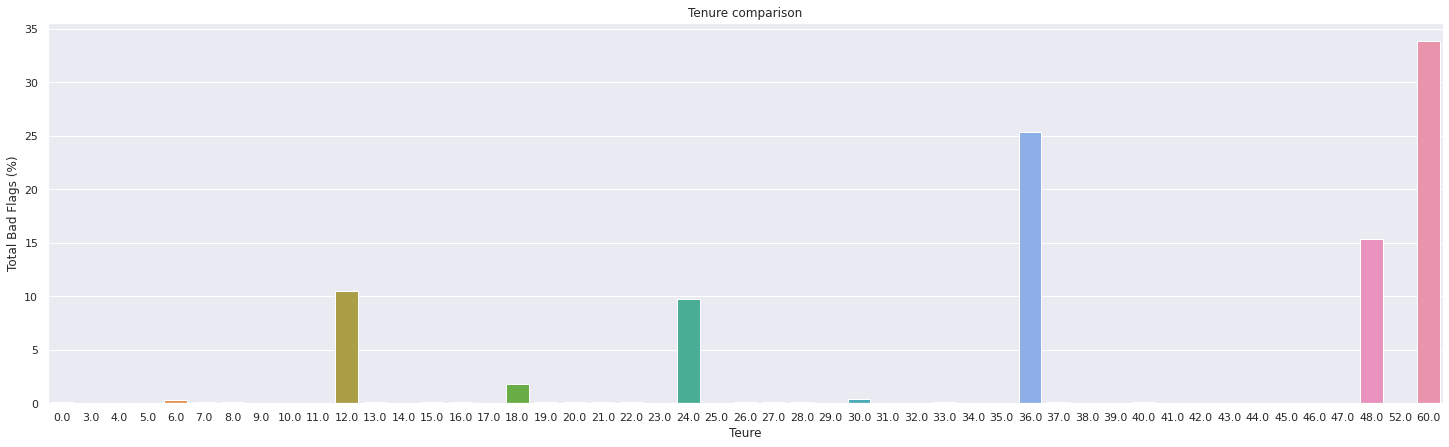

In [ ]:
x,y = get_count(df['tenure'])
plot(x,y, x_label='Teure', y_label='Total Bad Flags (%)', title='Tenure comparison', figsize=(25,7))

So the plot shows bad flags are aggregated on customers with work experience of exactly 1,2,3 and 4 years. To be sure if there is abnormality let's visualize good flags as well

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


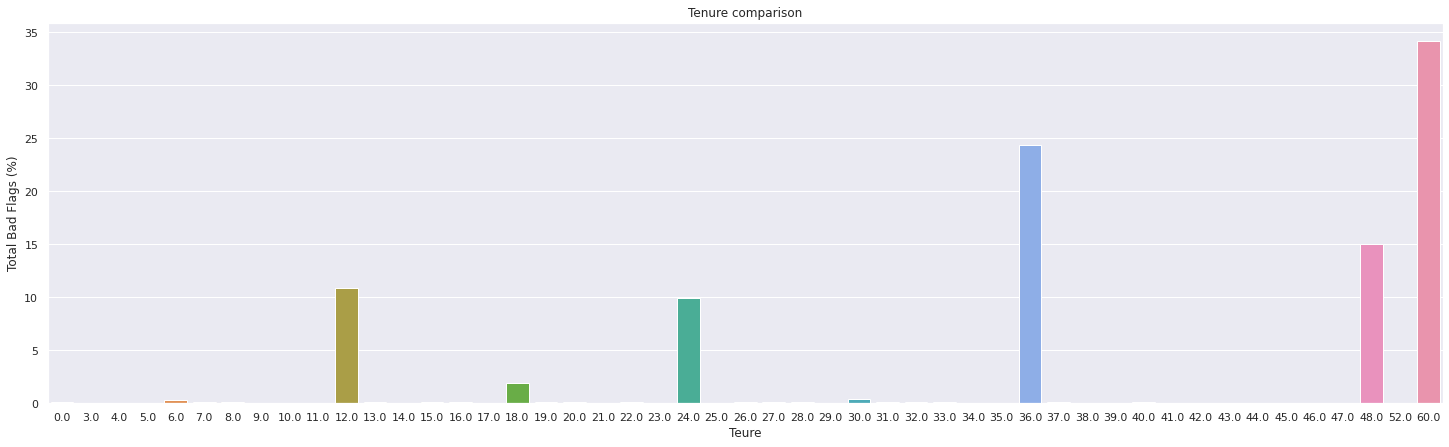

In [ ]:
x,y = get_count(df_not_bad_flag['tenure'])
plot(x,y, x_label='Teure', y_label='Total Bad Flags (%)', title='Tenure comparison', figsize=(25,7))

The trend is almost the same. This has to do with credit policy i think. So i am not gonna consider this as abnormality.

##8. Age

Firstly lets round age column

In [ ]:
df.age=df.age.apply(np.round)

In [ ]:
df.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag
0,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,57.0,Aran,Aran,0
1,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,35.0,Lankaran,Lankaran,0
2,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,36.0,Baku,Baku,0
3,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,24.0,Baku,Baku,0
4,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,30.0,Aran,Aran,0


Then create age bins for decades manually for better analysis

In [ ]:
age_bins = []
for row in df['age']:
  if row<20 and row>=10: age_bins.append('10s')
  elif row >= 20 and row<30:    age_bins.append('20s')
  elif row >= 30 and row<40:   age_bins.append('30s')
  elif row <=40 and row<50:  age_bins.append('40s')
  elif row <=50 and row<60:  age_bins.append('50s')
  elif row <=60 and row<70:  age_bins.append('60s')
  else:           age_bins.append('>60s')

In [ ]:
df['age_bins'] = age_bins

In [ ]:
df.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag,age_bins
0,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,57.0,Aran,Aran,0,60s
1,GTK,36.0,2450.0,Unknown,Masallı,M,Ministry of Education,Teacher,399.84,35.0,Lankaran,Lankaran,0,30s
2,BIRKART,60.0,2200.0,Xiaomi,Bakı,M,Ministry of Emergency,Other,1064.94,36.0,Baku,Baku,0,30s
3,GTK,36.0,8000.0,Iphone,Bakı,F,Government's committees,Other,1242.00,24.0,Baku,Baku,0,20s
4,GTK,48.0,7000.0,Xiaomi,Salyan,M,Executive Authority,Economist,365.43,30.0,Aran,Aran,0,30s


Finally we can visualize the relationship between age decades and bad flags

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


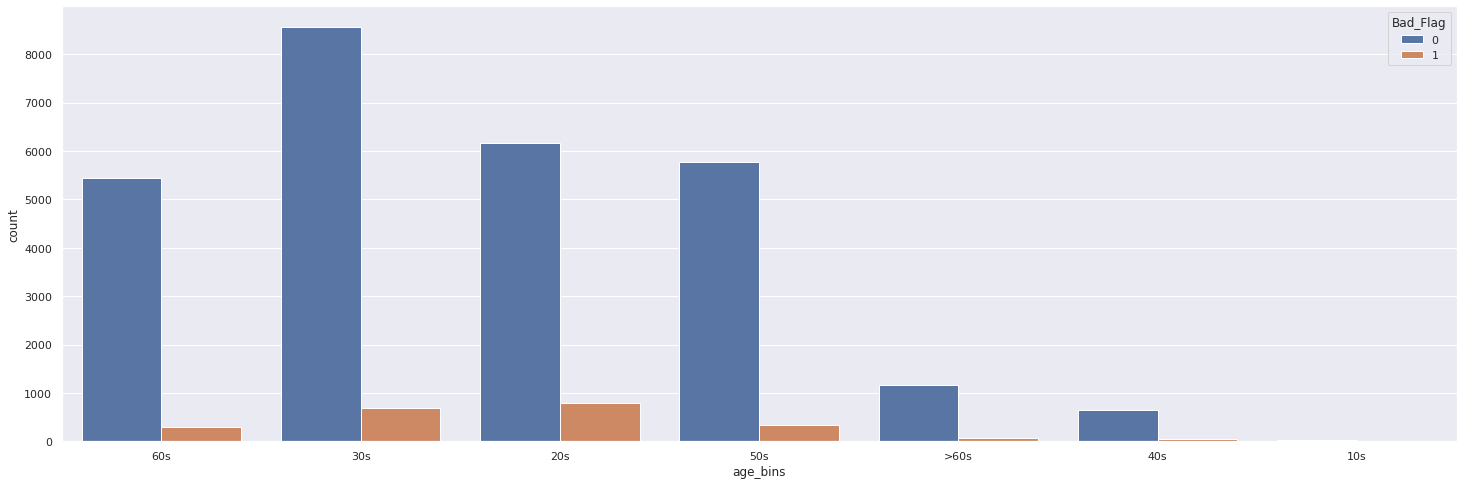

In [ ]:
sns.countplot('age_bins',hue='Bad_Flag',data=df)
plt.show()

So customers on their 20s or 30s are more tend to default in payment than others.

Let's now drop the age_bins column

In [ ]:
df.drop(['age_bins'], axis=1,inplace=True)

#Outlier Treatment

An outlier is an observation point that is distant from other observations. The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. It is represented by the formula IQR = Q3 − Q1.

In [ ]:
def pre_quantiles(df, column, q1 = 0.25, q3 = 0.75):
    """
    This function takes dataframe, each column separetly and calculates the
    percentiles of a dataset. The IQR can then be calculated as the difference between
    the 75th and 25th percentiles
    """
    Q1 = df[column].quantile(q1)
    Q3 = df[column].quantile(q3)
    IQR = Q3-Q1
    return Q1, Q3, IQR

def remove_outliers_numerical(df, column, Q1, Q3, IQR, coeff):
    """
    This function takes dataframe, each column, their 1st and 3rd quantiles, interquartile ranges and coefficiants.
    Then calculate the cutoff for outliers as 0.5 times the IQR and subtract this cut-off
    from the 25th percentile and add it to the 75th percentile to give the actual limits on the data. As a result of
    function we get dataframe which have each column's mentioned numbers.

    """

    df_o = df[~(((df[column] < (Q1 - coeff * IQR)[column])) | ((df[column] > (Q3 + coeff * IQR)[column])))]

    return df_o

def remove_from_dataframe(df, name):
    """
    This function takes dataframe and selects numerical variables and will remove outliers from them.
    Although, it is accepted that if our dependent variable is binary, then we won't get any outliers. I will not
    exclude them due to code complexity.

    """
    del_col = df.select_dtypes(exclude = 'number').columns
    numerical_columns = df.columns.difference(del_col)
    print(f'Before removing {name} outliers: {df.shape}')

    Q_data = pd.DataFrame(pre_quantiles(df, numerical_columns, q1 = 0.005, q3 = 0.995), index=['Q1', 'Q3', 'IQR'])

    for i in numerical_columns:
        df = remove_outliers_numerical(df, i, Q_data.iloc[0]["{0}".format(i)],
                                                      Q_data.iloc[1]["{0}".format(i)], Q_data.iloc[-1], coeff = 0.5)

    print(f'After removing {name} outliers: {df.shape}\n')
    return df


In [ ]:
X_train_outlier_free = remove_from_dataframe(X_train, 'TRAIN')
X_test_outlier_free = remove_from_dataframe(X_test, 'TEST')

Before removing TRAIN outliers: (23988, 12)
After removing TRAIN outliers: (23945, 12)

Before removing TEST outliers: (5997, 12)
After removing TEST outliers: (5990, 12)



In [ ]:
X_train_outlier_free.head(1)

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,GTK,36.0,3200.0,Samsung,Füzuli,F,Ministry of health,Nurse,287.33,29.134068,Aran,Aran


Because some rows are deleted in X, we need to take into account in our y. From now, I only will take outlier removed rows' targets.

In [ ]:
y_train = pd.DataFrame(y_train)
y_train = y_train.loc[y_train.index & X_train_outlier_free.index]


y_test = pd.DataFrame(y_test)
y_test = y_test.loc[y_test.index & X_test_outlier_free.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  


Checking the shapes again

In [ ]:
print(f'X train shape is: {X_train_outlier_free.shape}')
print(f'X test shape is: {X_test_outlier_free.shape}')
print(f'y train shape is: {y_train.shape}')
print(f'y test shape is: {y_test.shape}')

X train shape is: (23945, 12)
X test shape is: (5990, 12)
y train shape is: (23945, 1)
y test shape is: (5990, 1)


Let's now make a copy ofour feature data so that we can use this with other encoding techniques

In [ ]:
X_train_outlier_free1=X_train_outlier_free.copy()
X_test_outlier_free1=X_test_outlier_free.copy()

#Model1 - TargetEncoder (Logistic)

Let's build several models with different encoding techniques and see which one performs better

##Encoding categorical variables-TargetEncoder

In [ ]:
X_train_outlier_free.dtypes

PRODUCT                 object
tenure                 float64
INITIAL_AMOUNT         float64
mobile_name             object
CUSTOMER_CITY           object
gender                  object
Ministry                object
Position                object
Avg_salary             float64
age                    float64
Region_Location         object
Loan_location_group     object
dtype: object

In [ ]:
X_train_outlier_free

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,GTK,36.0,3200.0,Samsung,Füzuli,F,Ministry of health,Nurse,287.33,29.134068,Aran,Aran
17568,BIRKART,60.0,2300.0,Samsung,Bakı,M,Other Ministries,Guard,509.10,29.347625,Baku,Baku
619,BIRKART,60.0,2000.0,Samsung,İsmayıllı,F,Ministry of Education,Teacher,553.76,46.018741,Daqlig Shirvan,Daqlig Shirvan
17094,GTK,48.0,9350.0,Samsung,Laçın,M,Ministry of Internal Affair,Police,1010.28,24.014182,Aran,Aran
22597,BIRKART,60.0,3000.0,Iphone,Bakı,F,Ministry of Education,Teacher,811.00,35.316262,Baku,Baku
...,...,...,...,...,...,...,...,...,...,...,...,...
29817,BIRKART,60.0,2900.0,Samsung,Bakı,F,Ministry of Education,Teacher,498.25,36.260840,Baku,Baku
5394,GTK,36.0,8800.0,Samsung,Bakı,F,Ministry of Education,Other,803.50,65.723458,Baku,Baku
861,BIRKART,60.0,3050.0,others,Göyçay,F,Ministry of Education,Teacher,382.00,27.253126,Aran,Aran
15806,GTK,36.0,3000.0,others,Xırdalan,M,OJSC or CJSC Government's Companies,Other,301.50,34.467511,Absheron,Absheron


In [ ]:
# encode gender feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['gender'], y_train['Bad_Flag'])
X_train_outlier_free['gender'] = encoder.transform(X_train_outlier_free['gender'], y_train['Bad_Flag'])
X_test_outlier_free['gender'] = encoder.transform(X_test_outlier_free['gender'], y_test['Bad_Flag'])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
# encode PRODUCT feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['PRODUCT'], y_train['Bad_Flag'])
X_train_outlier_free['PRODUCT'] = encoder.transform(X_train_outlier_free['PRODUCT'], y_train['Bad_Flag'])
X_test_outlier_free['PRODUCT'] = encoder.transform(X_test_outlier_free['PRODUCT'], y_test['Bad_Flag'])

In [ ]:
# encode mobile_name feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['mobile_name'], y_train['Bad_Flag'])
X_train_outlier_free['mobile_name'] = encoder.transform(X_train_outlier_free['mobile_name'], y_train['Bad_Flag'])
X_test_outlier_free['mobile_name'] = encoder.transform(X_test_outlier_free['mobile_name'], y_test['Bad_Flag'])

In [ ]:
# encode CUSTOMER_CITY feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['CUSTOMER_CITY'], y_train['Bad_Flag'])
X_train_outlier_free['CUSTOMER_CITY'] = encoder.transform(X_train_outlier_free['CUSTOMER_CITY'], y_train['Bad_Flag'])
X_test_outlier_free['CUSTOMER_CITY'] = encoder.transform(X_test_outlier_free['CUSTOMER_CITY'], y_test['Bad_Flag'])

In [ ]:
# encode Ministry feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['Ministry'], y_train['Bad_Flag'])
X_train_outlier_free['Ministry'] = encoder.transform(X_train_outlier_free['Ministry'], y_train['Bad_Flag'])
X_test_outlier_free['Ministry'] = encoder.transform(X_test_outlier_free['Ministry'], y_test['Bad_Flag'])

In [ ]:
# encode Position feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['Position'], y_train['Bad_Flag'])
X_train_outlier_free['Position'] = encoder.transform(X_train_outlier_free['Position'], y_train['Bad_Flag'])
X_test_outlier_free['Position'] = encoder.transform(X_test_outlier_free['Position'], y_test['Bad_Flag'])

In [ ]:
# encode Region_Location feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['Region_Location'], y_train['Bad_Flag'])
X_train_outlier_free['Region_Location'] = encoder.transform(X_train_outlier_free['Region_Location'], y_train['Bad_Flag'])
X_test_outlier_free['Region_Location'] = encoder.transform(X_test_outlier_free['Region_Location'], y_test['Bad_Flag'])

In [ ]:
# encode Loan_location_group feature for train/test

encoder = TargetEncoder()
encoder.fit(X_train_outlier_free['Loan_location_group'], y_train['Bad_Flag'])
X_train_outlier_free['Loan_location_group'] = encoder.transform(X_train_outlier_free['Loan_location_group'], y_train['Bad_Flag'])
X_test_outlier_free['Loan_location_group'] = encoder.transform(X_test_outlier_free['Loan_location_group'], y_test['Bad_Flag'])

##Correlation Matrix

In [ ]:
train_corr  = X_train_outlier_free.corr(method='pearson').abs()
train_corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
PRODUCT,1.00,0.79,0.20,0.13,0.04,0.02,0.05,0.05,0.07,0.07,0.07,0.09
tenure,0.79,1.00,0.11,0.10,0.03,0.06,0.00,0.05,0.02,0.06,0.06,0.06
INITIAL_AMOUNT,0.20,0.11,1.00,0.06,0.01,0.15,0.06,0.12,0.50,0.05,0.04,0.04
mobile_name,0.13,0.10,0.06,1.00,0.03,0.02,0.03,0.05,0.11,0.17,0.09,0.12
CUSTOMER_CITY,0.04,0.03,0.01,0.03,1.00,0.05,0.05,0.05,0.01,0.03,0.10,0.02
gender,0.02,0.06,0.15,0.02,0.05,1.00,0.21,0.29,0.31,0.21,0.02,0.10
Ministry,0.05,0.00,0.06,0.03,0.05,0.21,1.00,0.38,0.01,0.13,0.17,0.36
Position,0.05,0.05,0.12,0.05,0.05,0.29,0.38,1.00,0.13,0.02,0.09,0.23
Avg_salary,0.07,0.02,0.50,0.11,0.01,0.31,0.01,0.13,1.00,0.15,0.07,0.13
age,0.07,0.06,0.05,0.17,0.03,0.21,0.13,0.02,0.15,1.00,0.03,0.09


In [ ]:
train_corr  = X_train_outlier_free.corr(method='pearson')
upper_tri = train_corr.where(np.triu(np.ones(train_corr.shape),k=1).astype(np.bool))
lower_tri = train_corr.where(np.tril(np.ones(train_corr.shape),k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
to_drop+=(column for column in lower_tri.columns if any(lower_tri[column] < -0.80))
print('Most correlated features: ', to_drop,'\n')


Most correlated features:  [] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Correlation matrix shows that we don't have a highly correlated feature, but as i have mentioned before we should not trust correlation matrix. So let's check VIF as well

##VIF Check

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_outlier_free.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_outlier_free.values, i)
                          for i in range(len(X_train_outlier_free.columns))]

print(vif_data)

                feature        VIF
0               PRODUCT  80.524871
1                tenure   7.870010
2        INITIAL_AMOUNT   3.794023
3           mobile_name  14.833853
4         CUSTOMER_CITY  12.367940
5                gender  18.171817
6              Ministry   4.082303
7              Position   8.582665
8            Avg_salary   4.658697
9                   age  13.957496
10      Region_Location  81.676036
11  Loan_location_group  23.286500


Region_Location and Loan_location_group are similar variables so I think removing just one of them is enough, and product has high VIF as well

In [ ]:
X_train_outlier_free=X_train_outlier_free.drop(columns=['Region_Location', 'PRODUCT'])

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_outlier_free.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train_outlier_free.values, i)
                          for i in range(len(X_train_outlier_free.columns))]

print(vif_data)

               feature        VIF
0               tenure   6.486684
1       INITIAL_AMOUNT   3.497838
2          mobile_name  12.444765
3        CUSTOMER_CITY  10.458195
4               gender  15.689909
5             Ministry   4.067273
6             Position   8.538358
7           Avg_salary   4.582955
8                  age  11.072682
9  Loan_location_group  14.234880


In [ ]:
X_test_outlier_free=X_test_outlier_free.drop(columns=['Region_Location', 'PRODUCT'])

##Scaling numerical data

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range. The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization.

Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision.

Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

In this project, I will standardize dataset using the scikit-learn object Normalization

In [ ]:
print(X_train_outlier_free.shape)
print(X_test_outlier_free.shape)
print(y_train.shape)
print(y_test.shape)

(23945, 10)
(5990, 10)
(23945, 1)
(5990, 1)


In [ ]:
X_train_outlier_free.dtypes

tenure                 float64
INITIAL_AMOUNT         float64
mobile_name            float64
CUSTOMER_CITY          float64
gender                 float64
Ministry               float64
Position               float64
Avg_salary             float64
age                    float64
Loan_location_group    float64
dtype: object

In [ ]:
X_test_outlier_free.dtypes

tenure                 float64
INITIAL_AMOUNT         float64
mobile_name            float64
CUSTOMER_CITY          float64
gender                 float64
Ministry               float64
Position               float64
Avg_salary             float64
age                    float64
Loan_location_group    float64
dtype: object

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_outlier_free)
X_test_scaled = scaler.transform(X_test_outlier_free)

In [ ]:
X_train_scaled_copy=X_train_scaled.copy()
X_test_scaled_copy=X_test_scaled.copy()

In [ ]:
X_train_scaled_copy2=X_train_scaled.copy()
X_test_scaled_copy2=X_test_scaled.copy()

##Model Building

In [ ]:
X_train_outlier_free.head(1)

,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Loan_location_group
252,36.0,3200.0,0.087743,0.075901,0.050602,0.045128,0.052308,287.33,29.134068,0.059608


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Train_Accuracy=accuracy_score(y_train,y_pred)
Train_Accuracy

0.926122363750261

In [ ]:
y_pred_test=model.predict(X_test_scaled)
Test_Accuracy=accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.9260434056761269

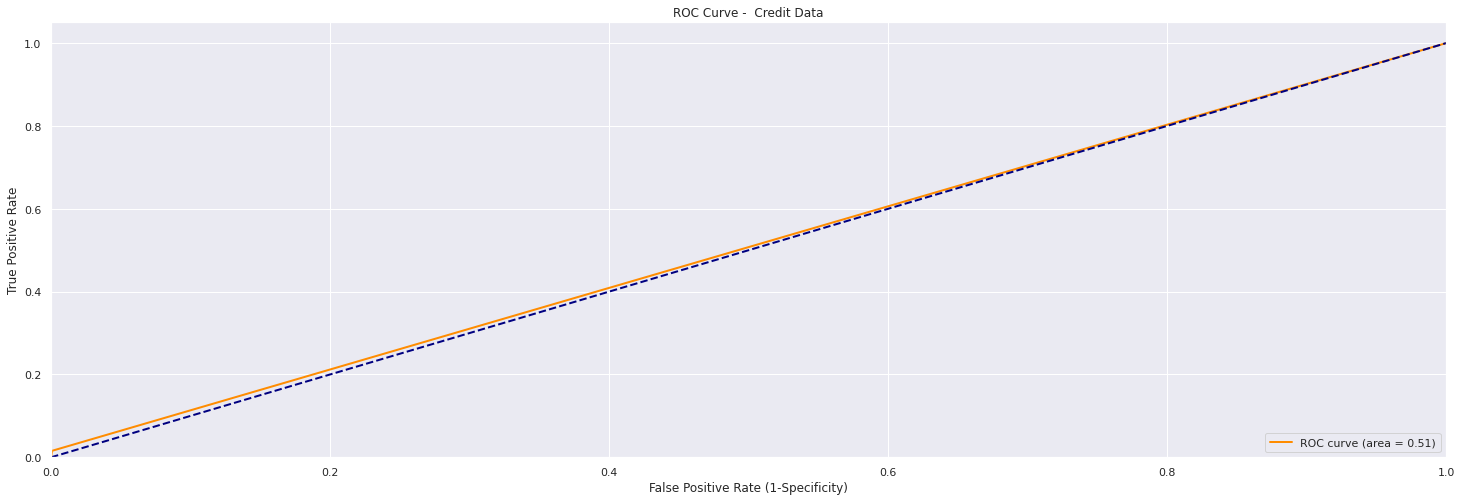

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import statsmodels.api as sm
x1=sm.add_constant(X_train_scaled)
reg_log=sm.Logit(y_train,x1)
r_log=reg_log.fit()
print ("\n \n",r_log.summary())

Optimization terminated successfully.
         Current function value: 0.234841
         Iterations 8

 
                            Logit Regression Results                           
Dep. Variable:               Bad_Flag   No. Observations:                23945
Model:                          Logit   Df Residuals:                    23934
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.1125
Time:                        03:48:13   Log-Likelihood:                -5623.3
converged:                       True   LL-Null:                       -6336.1
Covariance Type:            nonrobust   LLR p-value:                2.843e-300
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8126      0.193    -30.191      0.000      -6.190      -5.435
x1             0.5768    

In [ ]:
model.intercept_

array([-5.69830999])

In [ ]:
model.coef_

array([[ 0.55952996,  2.46303923,  2.24429538,  3.20447798,  0.25912919,
         2.3206091 ,  0.63154926, -3.32860673, -1.3677251 ,  0.20973605]])

In [ ]:
New_summary= df.drop(['Bad_Flag','PRODUCT','Region_Location'],axis=1)

In [ ]:
New_summary.columns.values

array(['tenure', 'INITIAL_AMOUNT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Avg_salary', 'age',
       'Loan_location_group'], dtype=object)

In [ ]:
feature_name=New_summary.columns.values

In [ ]:
Summary_Table=pd.DataFrame(columns=['Feature Name'], data = feature_name)
Summary_Table['Coefficient']=np.transpose(model.coef_)
Summary_Table.index=Summary_Table.index + 1
Summary_Table.loc[0]=['Intercept', model.intercept_[0]]
Summary_Table=Summary_Table.sort_index()
Summary_Table['Odds Ratio']=np.exp(Summary_Table.Coefficient)
Summary_Table.sort_values('Odds Ratio',ascending=False)

,Feature Name,Coefficient,Odds Ratio
4,CUSTOMER_CITY,3.204478,24.642633
2,INITIAL_AMOUNT,2.463039,11.740439
6,Ministry,2.320609,10.181874
3,mobile_name,2.244295,9.433766
7,Position,0.631549,1.880522
1,tenure,0.559530,1.749850
5,gender,0.259129,1.295801
10,Loan_location_group,0.209736,1.233352
9,age,-1.367725,0.254686
8,Avg_salary,-3.328607,0.035843


In [ ]:
print('Test Data Set')
print(classification_report(y_test,model.predict(X_test_scaled)))
print('-----------------------------------------------------------------')
print('Train Data Set')
print(classification_report(y_train,model.predict(X_train_scaled)))

Test Data Set
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5544
           1       0.64      0.02      0.03       446

    accuracy                           0.93      5990
   macro avg       0.78      0.51      0.50      5990
weighted avg       0.90      0.93      0.89      5990

-----------------------------------------------------------------
Train Data Set
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22166
           1       0.60      0.02      0.03      1779

    accuracy                           0.93     23945
   macro avg       0.76      0.51      0.50     23945
weighted avg       0.90      0.93      0.89     23945



In [ ]:
df.head(1)

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group,Bad_Flag
0,BIRKART,60.0,6400.0,Iphone,Biləsuvar,M,Ministry of Internal Affair,Other,1073.54,57.0,Aran,Aran,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


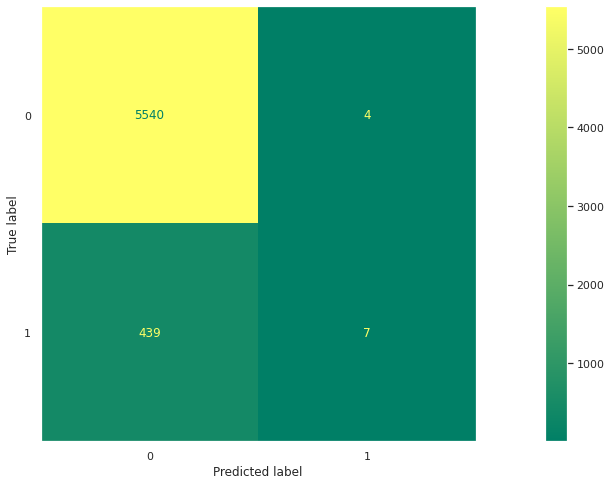

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names=np.unique(df['Bad_Flag'])
class_names
plot_confusion_matrix(model,X_test_scaled,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.summer);
plt.grid(False)

Seems like our model doesn't perform well since its false positives are very high, which means our accuracy is high just because of higher number of true negatives. Let's try another encoding techniue

#Model2 - LabelEncoder (Logistic)

##Encoding categorical variables-LabelEncoder

Makig another copy before I start encoding:

In [ ]:
X_train_outlier_free2=X_train_outlier_free1.copy()

In [ ]:
X_test_outlier_free2=X_test_outlier_free1.copy()

In [ ]:
X_train_outlier_free1.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,GTK,36.0,3200.0,Samsung,Füzuli,F,Ministry of health,Nurse,287.33,29.134068,Aran,Aran
17568,BIRKART,60.0,2300.0,Samsung,Bakı,M,Other Ministries,Guard,509.10,29.347625,Baku,Baku
619,BIRKART,60.0,2000.0,Samsung,İsmayıllı,F,Ministry of Education,Teacher,553.76,46.018741,Daqlig Shirvan,Daqlig Shirvan
17094,GTK,48.0,9350.0,Samsung,Laçın,M,Ministry of Internal Affair,Police,1010.28,24.014182,Aran,Aran
22597,BIRKART,60.0,3000.0,Iphone,Bakı,F,Ministry of Education,Teacher,811.00,35.316262,Baku,Baku


In [ ]:
X_train_outlier_free1.columns

Index(['PRODUCT', 'tenure', 'INITIAL_AMOUNT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Avg_salary', 'age',
       'Region_Location', 'Loan_location_group'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cols = ['PRODUCT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Region_Location', 'Loan_location_group']
#
# Encode labels of multiple columns at once
#
X_train_outlier_free1[cols] = X_train_outlier_free1[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
X_train_outlier_free1.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,1,36.0,3200.0,7,21,1,9,8,287.33,29.134068,1,1
17568,0,60.0,2300.0,7,11,2,12,3,509.10,29.347625,2,2
619,0,60.0,2000.0,7,74,1,5,11,553.76,46.018741,3,3
17094,1,48.0,9350.0,7,31,2,8,10,1010.28,24.014182,1,1
22597,0,60.0,3000.0,2,11,1,5,11,811.00,35.316262,2,2


In [ ]:
cols = ['PRODUCT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Region_Location', 'Loan_location_group']
#
# Encode labels of multiple columns at once
#
X_test_outlier_free1[cols] = X_test_outlier_free1[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
X_test_outlier_free1.head()

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
26365,1,12.0,5000.0,9,42,2,7,9,1272.87,27.839038,4,4
7573,1,48.0,3300.0,1,51,1,4,11,558.65,39.937850,0,0
26643,0,60.0,3500.0,9,5,1,5,11,665.55,53.101706,1,1
5203,1,36.0,7575.0,1,51,1,13,12,744.94,43.376661,0,2
29929,1,48.0,8540.0,6,39,1,5,11,554.83,33.227239,8,8


##Delete variables with high VIF

In [ ]:
X_train_outlier_free1=X_train_outlier_free1.drop(columns=['Region_Location', 'PRODUCT'])

In [ ]:
X_test_outlier_free1=X_test_outlier_free1.drop(columns=['Region_Location', 'PRODUCT'])

##Scaling

In [ ]:
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train_outlier_free1)
X_test_scaled1 = scaler.transform(X_test_outlier_free1)

##Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled1, y_train)
y_pred=model.predict(X_train_scaled1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Train_Accuracy=accuracy_score(y_train,y_pred)
Train_Accuracy

0.9257047400292336

In [ ]:
y_pred_test=model.predict(X_test_scaled1)
Test_Accuracy=accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.925542570951586

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


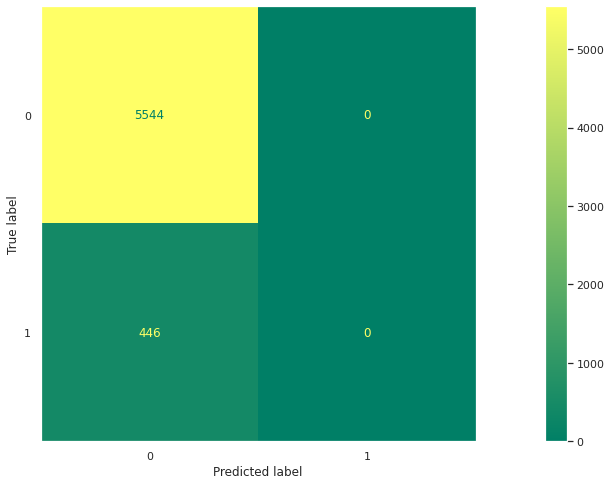

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names=np.unique(df['Bad_Flag'])
class_names
plot_confusion_matrix(model,X_test_scaled1,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.summer);
plt.grid(False)

Whoa! No true psotives at all! Model predicted all the cases as negatives-Good labels.

#Model3 - Monobin + SVMSMOTE (Logistic)

##Encoding-Weigth of Evidence

In [ ]:
X_train_outlier_free3=X_train_outlier_free2.copy()

In [ ]:
X_test_outlier_free3=X_test_outlier_free2.copy()

In [ ]:
# import packages

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [ ]:
X_train_outlier_free2.head(1)

,PRODUCT,tenure,INITIAL_AMOUNT,mobile_name,CUSTOMER_CITY,gender,Ministry,Position,Avg_salary,age,Region_Location,Loan_location_group
252,GTK,36.0,3200.0,Samsung,Füzuli,F,Ministry of health,Nurse,287.33,29.134068,Aran,Aran


In [ ]:
final_iv, IV = data_vars(X_train_outlier_free2,y_train['Bad_Flag'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,PRODUCT,BIRKART,BIRKART,8114,532,0.065566,7582,0.934434,0.299044,0.342055,-0.134381,0.008503
1,PRODUCT,GTK,GTK,15831,1247,0.078770,14584,0.921230,0.700956,0.657945,0.063324,0.008503
2,tenure,0.0,36.0,12046,914,0.075876,11132,0.924124,0.513772,0.502211,0.022760,0.000535
3,tenure,37.0,60.0,11899,865,0.072695,11034,0.927305,0.486228,0.497789,-0.023499,0.000535
4,INITIAL_AMOUNT,310.0,1900.0,7985,529,0.066249,7456,0.933751,0.297358,0.336371,-0.123278,0.018292
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Loan_location_group,Nakhchivan,Nakhchivan,693,30,0.043290,663,0.956710,0.016863,0.029911,-0.573069,0.088588
162,Loan_location_group,Quba-Khachmaz,Quba-Khachmaz,596,30,0.050336,566,0.949664,0.016863,0.025535,-0.414889,0.088588
163,Loan_location_group,Shaki-Zagatala,Shaki-Zagatala,1365,88,0.064469,1277,0.935531,0.049466,0.057611,-0.152424,0.088588
164,Loan_location_group,Yukhari Qarabag,Yukhari Qarabag,899,65,0.072303,834,0.927697,0.036537,0.037625,-0.029338,0.088588


In [ ]:
IV.sort_values('IV')

,VAR_NAME,IV
11,tenure,0.000535
5,PRODUCT,0.008503
2,INITIAL_AMOUNT,0.018292
7,Region_Location,0.021174
0,Avg_salary,0.030698
3,Loan_location_group,0.088588
1,CUSTOMER_CITY,0.092826
9,gender,0.095052
10,mobile_name,0.105045
8,age,0.131809


Let's delete the rows with information value lower than 0.02 and higher than 0.5

In [ ]:
X_train_outlier_free2=X_train_outlier_free2[['Avg_salary', 'CUSTOMER_CITY',
       'Loan_location_group', 'Ministry', 'Position',
       'Region_Location', 'age', 'gender', 'mobile_name']]
y_train=y_train['Bad_Flag']

In [ ]:
IV.to_csv('train.csv')

Applying WOE values to our dataframe columns

In [ ]:
transform_vars_list = X_train_outlier_free2.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [ ]:
transform_vars_list

Index(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'],
      dtype='object')

In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_train_outlier_free2[transform_prefix + var] = X_train_outlier_free2[var].apply(lambda x: eval(replace_cmd))
        except:
            X_train_outlier_free2[transform_prefix + var] = X_train_outlier_free2[var].apply(lambda x: eval(replace_cmd1))

In [ ]:
X_train_outlier_free2['gender'].value_counts()

M         13309
F         10217
0    M      419
Name: gender, dtype: int64

In [ ]:
X_train_outlier_free2['new_gender'].value_counts()

 0.238054    13309
-0.409330    10217
 0.029819      419
Name: new_gender, dtype: int64

In [ ]:
X_train_outlier_free2.columns

Index(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name',
       'new_Avg_salary', 'new_CUSTOMER_CITY', 'new_Loan_location_group',
       'new_Ministry', 'new_Position', 'new_Region_Location', 'new_age',
       'new_gender', 'new_mobile_name'],
      dtype='object')

In [ ]:
X_train_outlier_free2=X_train_outlier_free2.drop(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'], axis=1)

No I should apply all the steps to the test data as well:

In [ ]:
final_iv, IV = data_vars(X_test_outlier_free2,y_test['Bad_Flag'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
X_test_outlier_free2=X_test_outlier_free2[['Avg_salary', 'CUSTOMER_CITY',
       'Loan_location_group', 'Ministry', 'Position',
       'Region_Location', 'age', 'gender', 'mobile_name']]
y_test=y_test['Bad_Flag']

In [ ]:
transform_vars_list = X_test_outlier_free2.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_test_outlier_free2[transform_prefix + var] = X_test_outlier_free2[var].apply(lambda x: eval(replace_cmd))
        except:
            X_test_outlier_free2[transform_prefix + var] = X_test_outlier_free2[var].apply(lambda x: eval(replace_cmd1))

In [ ]:
X_test_outlier_free2=X_test_outlier_free2.drop(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'], axis=1)

##Undersampling & Oversampling

In [ ]:
# from imblearn.combine import SMOTEENN
# smote_enn = SMOTEENN(random_state=0)
# X_train_outlier_free2, y_train2 = smote_enn.fit_resample(X_train_outlier_free2, y_train2)
# print(sorted(Counter(y_train2).items()))

In [ ]:
###

In [ ]:
# from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=0)
# X_train_outlier_free2, y_train2 = smote_tomek.fit_resample(X_train_outlier_free2, y_train2)
# print(sorted(Counter(y_train2).items()))

keep the copy of train data for further use

In [ ]:
y_train2=y_train.copy()

In [ ]:
y_train3=y_train.copy()

In [ ]:
y_train4=y_train.copy()

In [ ]:
y_train5=y_train.copy()

Borderline-SMOTE is a variation of the SMOTE. So, unlike with the SMOTE, where the synthetic data are created randomly between the two data, Borderline-SMOTE only makes synthetic data along the decision boundary between the two classes.

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE

# oversample = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
# X_train_outlier_free2, y_train2 = oversample.fit_resample(X_train_outlier_free2, y_train2)

In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE(random_state = 101)
X_train_outlier_free2, y_train2 = oversample.fit_resample(X_train_outlier_free2, y_train2)

In [ ]:
# from imblearn.over_sampling import BorderlineSMOTE

# oversample = BorderlineSMOTE(random_state = 101, kind = 'borderline-2')
# X_train_outlier_free2, y_train2 = oversample.fit_resample(X_train_outlier_free2, y_train2)

In [ ]:
# oversample = SMOTE()
# X_train_outlier_free2, y_train2 = oversample.fit_resample(X_train_outlier_free2, y_train2)

In [ ]:
# undersample = NearMiss(version=3, n_neighbors_ver3=3)
# X_train_outlier_free2, y_train = undersample.fit_resample(X_train_outlier_free2, y_train2)

In [ ]:
print(X_train_outlier_free2.shape)
print(X_test_outlier_free2.shape)
print(y_train2.shape)
print(y_test.shape)

(44332, 9)
(5990, 9)
(44332,)
(5990,)


I have tried both undersampling and oversampling methods, but it seems undersampling decreases model performance. Also, methods like SMOTETomek and SMOTEENN do both undersampling and oversampling at the same time but they also did not perform well, so i am using SMOTE since I think it fits best for our model

FINALLY I can start building my model

##Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_outlier_free2, y_train2)
y_pred=model.predict(X_train_outlier_free2)

In [ ]:
Train_Accuracy=balanced_accuracy_score(y_train2,y_pred)
Train_Accuracy

0.7666020030677614

In [ ]:
y_pred_test=model.predict(X_test_outlier_free2)
Test_Accuracy=balanced_accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.672634011479303

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


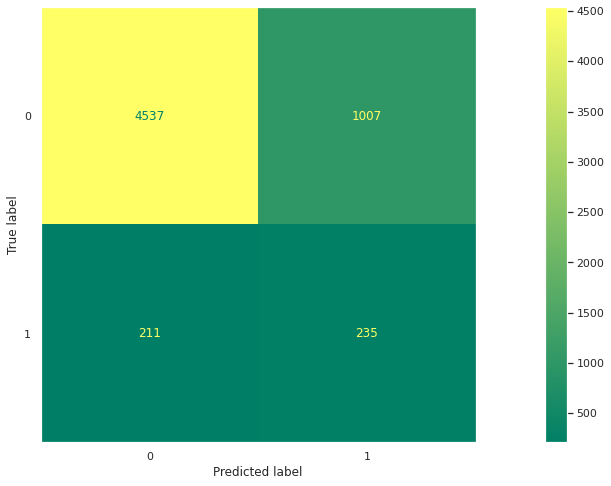

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names=np.unique(df['Bad_Flag'])
class_names
plot_confusion_matrix(model,X_test_outlier_free2,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.summer);
plt.grid(False)

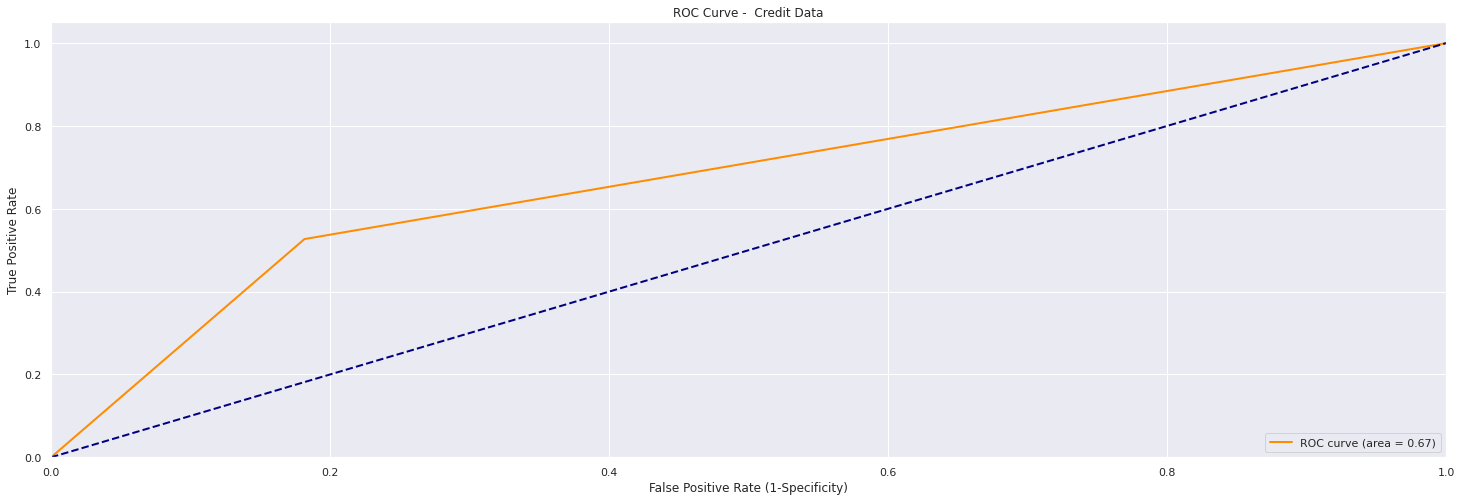

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.672634011479303

In [ ]:
Gini=(2*roc_auc)-1
print(Gini)

0.34526802295860604


In [ ]:
import statsmodels.api as sm
x1=sm.add_constant(X_train_outlier_free2)
reg_log=sm.Logit(y_train2,x1)
r_log=reg_log.fit()
print ("\n \n",r_log.summary())

Optimization terminated successfully.
         Current function value: 0.480083
         Iterations 6

 
                            Logit Regression Results                           
Dep. Variable:               Bad_Flag   No. Observations:                44332
Model:                          Logit   Df Residuals:                    44322
Method:                           MLE   Df Model:                            9
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.3074
Time:                        03:49:10   Log-Likelihood:                -21283.
converged:                       True   LL-Null:                       -30729.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4230      0.012    -34.232      0.000      -0.44

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model.coef_

array([[1.57636394, 1.23684078, 0.363118  , 1.10656665, 0.26132673,
        0.5434022 , 1.12780409, 0.46492574, 1.83169595]])

In [ ]:
model.intercept_

array([-0.42261067])

#Model 4 - WOE + BorderlineSMOTE2 (Logistic)

In [ ]:
X_train_outlier_free4=X_train_outlier_free3.copy()

In [ ]:
X_test_outlier_free4=X_train_outlier_free3.copy()

In [ ]:
X_train_outlier_free3.shape

(23945, 12)

In [ ]:
y_train3.shape

(23945,)

In [ ]:
y_train3.values

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X_train_outlier_free3['Bad_Flag'] = y_train3.values

In [ ]:
import pandas as pd, numpy as np, os, re, math, time

# to check monotonicity of a series
def is_monotonic(temp_series):
    return all(temp_series[i] <= temp_series[i + 1] for i in range(len(temp_series) - 1)) or all(temp_series[i] >= temp_series[i + 1] for i in range(len(temp_series) - 1))

def prepare_bins(bin_data, c_i, target_col, max_bins):
    force_bin = True
    binned = False
    remarks = np.nan
    # ----------------- Monotonic binning -----------------
    for n_bins in range(max_bins, 2, -1):
        try:
            bin_data[c_i + "_bins"] = pd.qcut(bin_data[c_i], n_bins, duplicates="drop")
            monotonic_series = bin_data.groupby(c_i + "_bins")[target_col].mean().reset_index(drop=True)
            if is_monotonic(monotonic_series):
                force_bin = False
                binned = True
                remarks = "binned monotonically"
                break
        except:
            pass
    # ----------------- Force binning -----------------
    # creating 2 bins forcefully because 2 bins will always be monotonic
    if force_bin or (c_i + "_bins" in bin_data and bin_data[c_i + "_bins"].nunique() < 2):
        _min=bin_data[c_i].min()
        _mean=bin_data[c_i].mean()
        _max=bin_data[c_i].max()
        bin_data[c_i + "_bins"] = pd.cut(bin_data[c_i], [_min, _mean, _max], include_lowest=True)
        if bin_data[c_i + "_bins"].nunique() == 2:
            binned = True
            remarks = "binned forcefully"

    if binned:
        return c_i + "_bins", remarks, bin_data[[c_i, c_i+"_bins", target_col]].copy()
    else:
        remarks = "couldn't bin"
        return c_i, remarks, bin_data[[c_i, target_col]].copy()

# calculate WOE and IV for every group/bin/class for a provided feature
def iv_woe_4iter(binned_data, target_col, class_col):
    if "_bins" in class_col:
        binned_data[class_col] = binned_data[class_col].cat.add_categories(['Missing'])
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col.replace("_bins", ""):["min", "max"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()
    else:
        binned_data[class_col] = binned_data[class_col].fillna("Missing")
        temp_groupby = binned_data.groupby(class_col).agg({class_col:["first", "first"],
                                                           target_col: ["count", "sum", "mean"]}).reset_index()

    temp_groupby.columns = ["sample_class", "min_value", "max_value", "sample_count", "event_count", "event_rate"]
    temp_groupby["non_event_count"] = temp_groupby["sample_count"] - temp_groupby["event_count"]
    temp_groupby["non_event_rate"] = 1 - temp_groupby["event_rate"]
    temp_groupby = temp_groupby[["sample_class", "min_value", "max_value", "sample_count",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]

    if "_bins" not in class_col and "Missing" in temp_groupby["min_value"]:
        temp_groupby["min_value"] = temp_groupby["min_value"].replace({"Missing": np.nan})
        temp_groupby["max_value"] = temp_groupby["max_value"].replace({"Missing": np.nan})
    temp_groupby["feature"] = class_col
    if "_bins" in class_col:
        temp_groupby["sample_class_label"]=temp_groupby["sample_class"].replace({"Missing": np.nan}).astype('category').cat.codes.replace({-1: np.nan})
    else:
        temp_groupby["sample_class_label"]=np.nan
    temp_groupby = temp_groupby[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                                 "non_event_count", "non_event_rate", "event_count", "event_rate"]]

    """
    **********get distribution of good and bad
    """
    temp_groupby['distbn_non_event'] = temp_groupby["non_event_count"]/temp_groupby["non_event_count"].sum()
    temp_groupby['distbn_event'] = temp_groupby["event_count"]/temp_groupby["event_count"].sum()

    temp_groupby['woe'] = np.log(temp_groupby['distbn_non_event'] / temp_groupby['distbn_event'])
    temp_groupby['iv'] = (temp_groupby['distbn_non_event'] - temp_groupby['distbn_event']) * temp_groupby['woe']

    temp_groupby["woe"] = temp_groupby["woe"].replace([np.inf,-np.inf],0)
    temp_groupby["iv"] = temp_groupby["iv"].replace([np.inf,-np.inf],0)

    return temp_groupby

"""
- iterate over all features.
- calculate WOE & IV for there classes.
- append to one DataFrame woe_iv.
"""
def var_iter(data, target_col, max_bins):
    woe_iv = pd.DataFrame()
    remarks_list = []
    for c_i in data.columns:
        if c_i not in [target_col]:
            # check if binning is required. if yes, then prepare bins and calculate woe and iv.
            """
            ----logic---
            binning is done only when feature is continuous and non-binary.
            Note: Make sure dtype of continuous columns in dataframe is not object.
            """
            c_i_start_time=time.time()
            if np.issubdtype(data[c_i], np.number) and data[c_i].nunique() > 2:
                class_col, remarks, binned_data = prepare_bins(data[[c_i, target_col]].copy(), c_i, target_col, max_bins)
                agg_data = iv_woe_4iter(binned_data.copy(), target_col, class_col)
                remarks_list.append({"feature": c_i, "remarks": remarks})
            else:
                agg_data = iv_woe_4iter(data[[c_i, target_col]].copy(), target_col, c_i)
                remarks_list.append({"feature": c_i, "remarks": "categorical"})
            # print("---{} seconds. c_i: {}----".format(round(time.time() - c_i_start_time, 2), c_i))
            woe_iv = woe_iv.append(agg_data)
    return woe_iv, pd.DataFrame(remarks_list)

# after getting woe and iv for all classes of features calculate aggregated IV values for features.
def get_iv_woe(data, target_col, max_bins):
    func_start_time = time.time()
    woe_iv, binning_remarks = var_iter(data, target_col, max_bins)
    print("------------------IV and WOE calculated for individual groups.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))

    woe_iv["feature"] = woe_iv["feature"].replace("_bins", "", regex=True)
    woe_iv = woe_iv[["feature", "sample_class", "sample_class_label", "sample_count", "min_value", "max_value",
                     "non_event_count", "non_event_rate", "event_count", "event_rate", 'distbn_non_event',
                     'distbn_event', 'woe', 'iv']]

    iv = woe_iv.groupby("feature")[["iv"]].agg(["sum", "count"]).reset_index()
    print("------------------Aggregated IV values for features calculated.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))

    iv.columns = ["feature", "iv", "number_of_classes"]
    null_percent_data=pd.DataFrame(data.isnull().mean()).reset_index()
    null_percent_data.columns=["feature", "feature_null_percent"]
    iv=iv.merge(null_percent_data, on="feature", how="left")
    print("------------------Null percent calculated in features.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    iv = iv.merge(binning_remarks, on="feature", how="left")
    woe_iv = woe_iv.merge(iv[["feature", "iv", "remarks"]].rename(columns={"iv": "iv_sum"}), on="feature", how="left")
    print("------------------Binning remarks added and process is complete.------------------")
    print("Total time elapsed: {} minutes".format(round((time.time() - func_start_time) / 60, 3)))
    return iv, woe_iv.replace({"Missing": np.nan})

In [ ]:
iv, woe_iv = get_iv_woe(X_train_outlier_free3, target_col='Bad_Flag', max_bins=20)
print(iv.shape, woe_iv.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.01 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.01 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.01 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.01 minutes
(12, 5) (170, 16)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
woe_iv

,feature,sample_class,sample_class_label,sample_count,min_value,max_value,non_event_count,non_event_rate,event_count,event_rate,distbn_non_event,distbn_event,woe,iv,iv_sum,remarks
0,PRODUCT,BIRKART,NaN,8114,BIRKART,BIRKART,7582,0.934434,532,0.065566,0.342055,0.299044,0.134381,0.005780,0.008503,categorical
1,PRODUCT,GTK,NaN,15831,GTK,GTK,14584,0.921230,1247,0.078770,0.657945,0.700956,-0.063324,0.002724,0.008503,categorical
2,tenure,"(-0.001, 36.0]",0.0,12046,0.0,36.0,11132,0.924124,914,0.075876,0.502211,0.513772,-0.022760,0.000263,0.000535,binned monotonically
3,tenure,"(36.0, 60.0]",1.0,11899,37.0,60.0,11034,0.927305,865,0.072695,0.497789,0.486228,0.023499,0.000272,0.000535,binned monotonically
4,tenure,NaN,NaN,0,NaN,NaN,0,NaN,0,NaN,0.000000,0.000000,NaN,NaN,0.000535,binned monotonically
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Loan_location_group,Nakhchivan,NaN,693,Nakhchivan,Nakhchivan,663,0.956710,30,0.043290,0.029911,0.016863,0.573069,0.007477,0.088588,categorical
166,Loan_location_group,Quba-Khachmaz,NaN,596,Quba-Khachmaz,Quba-Khachmaz,566,0.949664,30,0.050336,0.025535,0.016863,0.414889,0.003598,0.088588,categorical
167,Loan_location_group,Shaki-Zagatala,NaN,1365,Shaki-Zagatala,Shaki-Zagatala,1277,0.935531,88,0.064469,0.057611,0.049466,0.152424,0.001241,0.088588,categorical
168,Loan_location_group,Yukhari Qarabag,NaN,899,Yukhari Qarabag,Yukhari Qarabag,834,0.927697,65,0.072303,0.037625,0.036537,0.029338,0.000032,0.088588,categorical


In [ ]:
iv

,feature,iv,number_of_classes,feature_null_percent,remarks
0,Avg_salary,0.030698,4,0.0,binned monotonically
1,CUSTOMER_CITY,0.092826,83,0.0,categorical
2,INITIAL_AMOUNT,0.018292,3,0.0,binned monotonically
3,Loan_location_group,0.088588,11,0.0,categorical
4,Ministry,0.397785,14,0.0,categorical
5,PRODUCT,0.008503,2,0.0,categorical
6,Position,0.213127,15,0.0,categorical
7,Region_Location,0.021174,10,0.0,categorical
8,age,0.131809,6,0.0,binned monotonically
9,gender,0.095052,3,0.0,categorical


In [ ]:
X_train_outlier_free3=X_train_outlier_free3[['Avg_salary', 'CUSTOMER_CITY',
       'Loan_location_group', 'Ministry', 'Position',
       'Region_Location', 'age', 'gender', 'mobile_name']]

In [ ]:
transform_vars_list = X_train_outlier_free3.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [ ]:
transform_vars_list

Index(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'],
      dtype='object')

In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_train_outlier_free3[transform_prefix + var] = X_train_outlier_free3[var].apply(lambda x: eval(replace_cmd))
        except:
            X_train_outlier_free3[transform_prefix + var] = X_train_outlier_free3[var].apply(lambda x: eval(replace_cmd1))

In [ ]:
X_train_outlier_free3=X_train_outlier_free3.drop(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'], axis=1)

Appling to the test data

In [ ]:
X_test_outlier_free3['Bad_Flag'] = y_test.values

In [ ]:
iv, woe_iv = get_iv_woe(X_test_outlier_free3, target_col='Bad_Flag', max_bins=20)
print(iv.shape, woe_iv.shape)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


------------------IV and WOE calculated for individual groups.------------------
Total time elapsed: 0.007 minutes
------------------Aggregated IV values for features calculated.------------------
Total time elapsed: 0.008 minutes
------------------Null percent calculated in features.------------------
Total time elapsed: 0.008 minutes
------------------Binning remarks added and process is complete.------------------
Total time elapsed: 0.008 minutes
(12, 5) (162, 16)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3553: PerformanceWarning: indexing past lexsort depth may impact performance.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
X_test_outlier_free3=X_test_outlier_free3[['Avg_salary', 'CUSTOMER_CITY',
       'Loan_location_group', 'Ministry', 'Position',
       'Region_Location', 'age', 'gender', 'mobile_name']]

In [ ]:
transform_vars_list = X_test_outlier_free3.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [ ]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            X_test_outlier_free3[transform_prefix + var] = X_test_outlier_free3[var].apply(lambda x: eval(replace_cmd))
        except:
            X_test_outlier_free3[transform_prefix + var] = X_test_outlier_free3[var].apply(lambda x: eval(replace_cmd1))

In [ ]:
X_test_outlier_free3=X_test_outlier_free3.drop(['Avg_salary', 'CUSTOMER_CITY', 'Loan_location_group', 'Ministry',
       'Position', 'Region_Location', 'age', 'gender', 'mobile_name'], axis=1)

In [ ]:
oversample = SMOTE()
X_train_outlier_free3, y_train3 = oversample.fit_resample(X_train_outlier_free3, y_train3)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE(random_state = 101, kind = 'borderline-2')
X_train_outlier_free3, y_train3 = oversample.fit_resample(X_train_outlier_free3, y_train3)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_outlier_free3, y_train3)
y_pred=model.predict(X_train_outlier_free3)

In [ ]:
Train_Accuracy=balanced_accuracy_score(y_train3,y_pred)
Train_Accuracy

0.6435757466389966

In [ ]:
y_pred_test=model.predict(X_test_outlier_free3)
Test_Accuracy=balanced_accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.6671285241913044

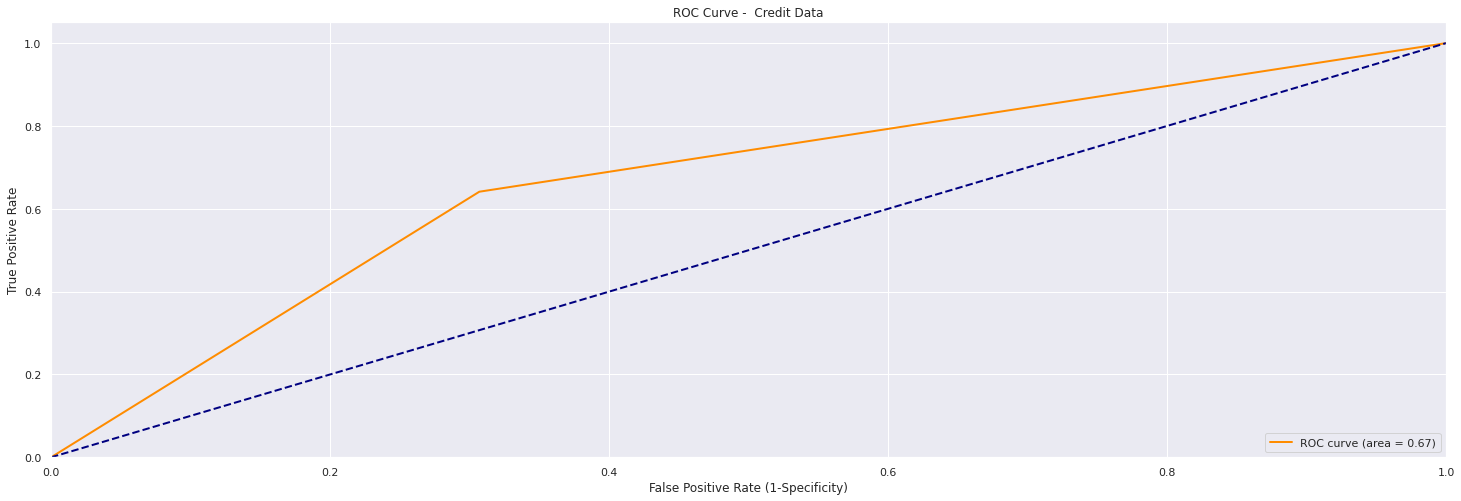

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.6671285241913045

In [ ]:
Gini=(2*roc_auc)-1
print(Gini)

0.33425704838260906


In [ ]:
model.intercept_

array([0.02159349])

In [ ]:
model.coef_

array([[0.65408813, 0.06100888, 0.05326786, 0.65222899, 0.146234  ,
        0.17483791, 0.99701266, 0.52680893, 1.64295152]])

#Model5 - TargetEncoder + BorderlineSMOTE1 (Logistic)

This time, I want to try building model by oversampling the targetencoded data (remember 1st model)

##Oversampling

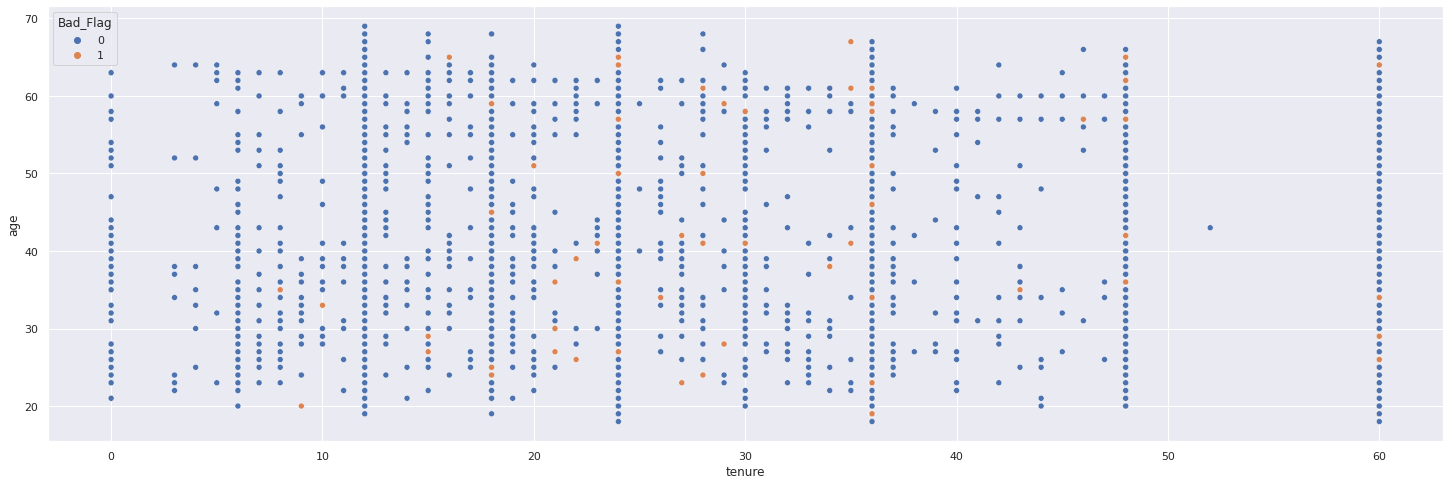

In [ ]:
df_example = df[['tenure', 'age', 'Bad_Flag']]
sns.scatterplot(data = df, x ='tenure', y = 'age', hue = 'Bad_Flag')

In [ ]:
# oversample = SMOTE()
# X_train_scaled, y_train = oversample.fit_resample(X_train_scaled, y_train)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_scaled, y_train = oversample.fit_resample(X_train_scaled, y_train)

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(44332, 10)
(5990, 10)
(44332,)
(5990,)


##Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_train_scaled)

In [ ]:
Train_Accuracy=balanced_accuracy_score(y_train,y_pred)
Train_Accuracy

0.7375259406297934

In [ ]:
y_pred_test=model.predict(X_test_scaled)
Test_Accuracy=balanced_accuracy_score(y_test,y_pred_test)
Test_Accuracy

0.6760158438970099

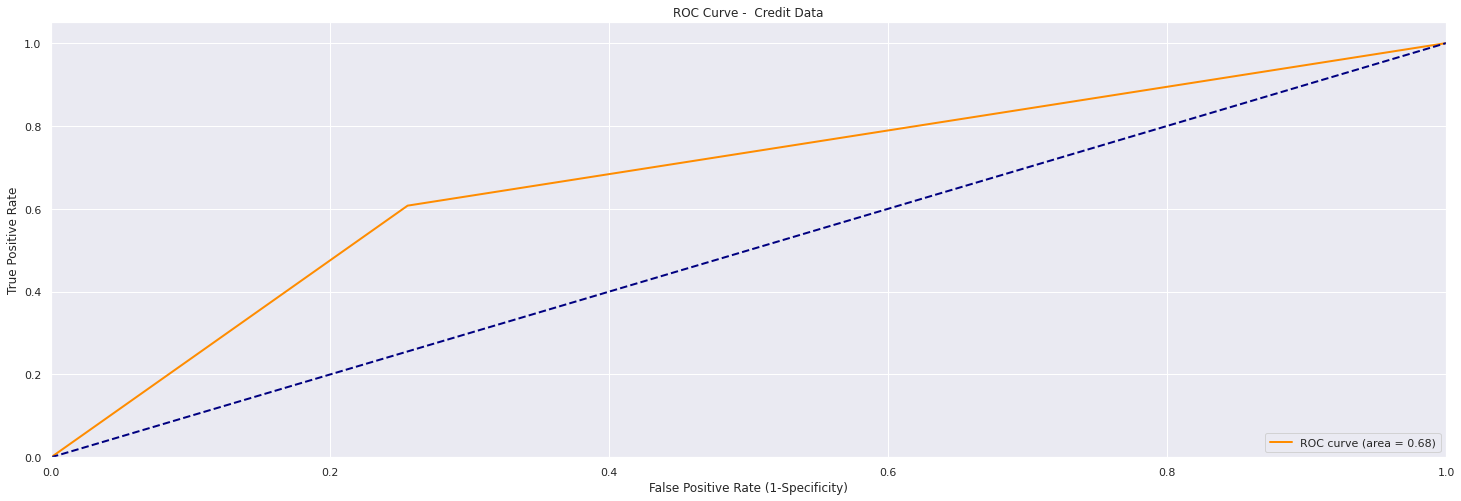

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_test, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.6760158438970099

In [ ]:
Gini=(2*roc_auc)-1

In [ ]:
Gini

0.3520316877940197

In [ ]:
import statsmodels.api as sm
x1=sm.add_constant(X_train_scaled)
reg_log=sm.Logit(y_train,x1)
r_log=reg_log.fit()
print ("\n \n",r_log.summary())

Optimization terminated successfully.
         Current function value: 0.535599
         Iterations 6

 
                            Logit Regression Results                           
Dep. Variable:               Bad_Flag   No. Observations:                44332
Model:                          Logit   Df Residuals:                    44321
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Jul 2022   Pseudo R-squ.:                  0.2273
Time:                        03:49:34   Log-Likelihood:                -23744.
converged:                       True   LL-Null:                       -30729.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5954      0.089    -51.725      0.000      -4.770      -4.421
x1             0.9169    

In [ ]:
model.intercept_

array([-4.53981131])

In [ ]:
model.coef_

array([[ 0.90773388,  4.50423556,  2.96541363,  4.28640619,  0.45712036,
         3.08668096,  0.90959865, -5.57816603, -1.95686928,  0.1508133 ]])

In [ ]:
New_summary= df.drop(['Bad_Flag','PRODUCT','Region_Location'],axis=1)

In [ ]:
New_summary.columns.values

array(['tenure', 'INITIAL_AMOUNT', 'mobile_name', 'CUSTOMER_CITY',
       'gender', 'Ministry', 'Position', 'Avg_salary', 'age',
       'Loan_location_group'], dtype=object)

In [ ]:
feature_name=New_summary.columns.values

In [ ]:
Summary_Table=pd.DataFrame(columns=['Feature Name'], data = feature_name)
Summary_Table['Coefficient']=np.transpose(model.coef_)
Summary_Table.index=Summary_Table.index + 1
Summary_Table.loc[0]=['Intercept', model.intercept_[0]]
Summary_Table=Summary_Table.sort_index()
Summary_Table['Odds Ratio']=np.exp(Summary_Table.Coefficient)
Summary_Table.sort_values('Odds Ratio',ascending=False)

,Feature Name,Coefficient,Odds Ratio
2,INITIAL_AMOUNT,4.504236,90.399213
4,CUSTOMER_CITY,4.286406,72.704712
6,Ministry,3.086681,21.904256
3,mobile_name,2.965414,19.402727
7,Position,0.909599,2.483326
1,tenure,0.907734,2.478699
5,gender,0.457120,1.579519
10,Loan_location_group,0.150813,1.162780
9,age,-1.956869,0.141300
0,Intercept,-4.539811,0.010675


In [ ]:
print('Test Data Set')
print(classification_report(y_test,model.predict(X_test_scaled)))
print('-----------------------------------------------------------------')
print('Train Data Set')
print(classification_report(y_train,model.predict(X_train_scaled)))

Test Data Set
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      5544
           1       0.16      0.61      0.25       446

    accuracy                           0.73      5990
   macro avg       0.56      0.68      0.55      5990
weighted avg       0.90      0.73      0.79      5990

-----------------------------------------------------------------
Train Data Set
              precision    recall  f1-score   support

           0       0.73      0.75      0.74     22166
           1       0.74      0.73      0.73     22166

    accuracy                           0.74     44332
   macro avg       0.74      0.74      0.74     44332
weighted avg       0.74      0.74      0.74     44332



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


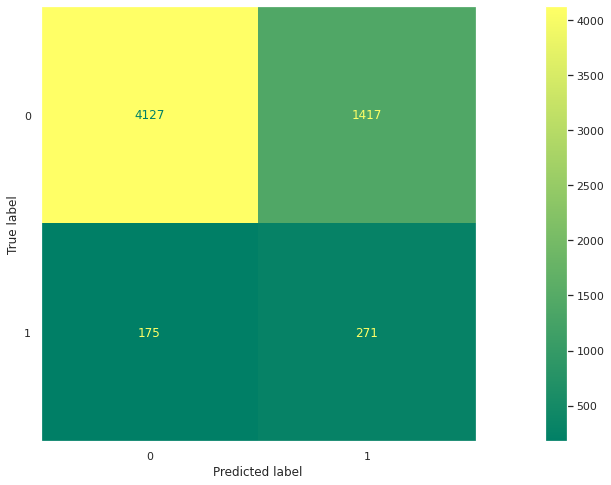

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names=np.unique(df['Bad_Flag'])
class_names
plot_confusion_matrix(model,X_test_scaled,y_test,
                     display_labels=class_names,
                     cmap=plt.cm.summer);
plt.grid(False)

#Model6 - TargetEncoder + BorderlineSMOTE1 (Neural Networks)

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE

oversample = BorderlineSMOTE(random_state = 101, kind = 'borderline-1')
X_train_scaled_copy, y_train4 = oversample.fit_resample(X_train_scaled_copy, y_train4)

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization, SpatialDropout2D, SpatialDropout1D, Flatten, GRU, GaussianNoise
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

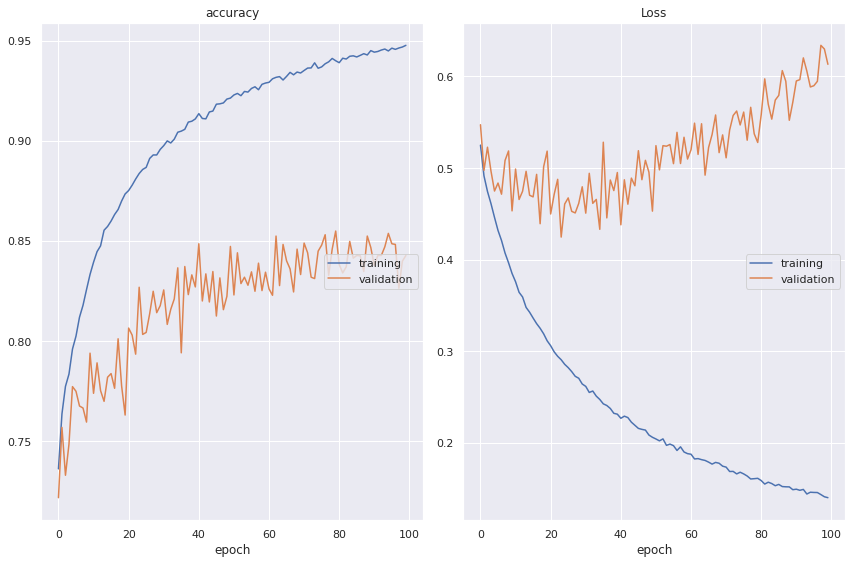

accuracy
	training         	 (min:    0.736, max:    0.948, cur:    0.948)
	validation       	 (min:    0.722, max:    0.855, cur:    0.843)
Loss
	training         	 (min:    0.140, max:    0.525, cur:    0.140)
	validation       	 (min:    0.425, max:    0.634, cur:    0.613)
1386/1386 [==============================] - 5s 4ms/step - loss: 0.1403 - accuracy: 0.9476 - val_loss: 0.6132 - val_accuracy: 0.8427


In [ ]:
tf.random.set_seed(42)

# Add an extra layer and increase number of units
model = tf.keras.Sequential([
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(300, activation='relu'),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid') # 1 unit (important for output layer)
])

#callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
plot_callback = [PlotLossesCallback()]

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


history = model.fit(X_train_scaled_copy, y_train4, epochs=100, validation_data=(X_test_scaled_copy, y_test), verbose=1, callbacks=[plot_callback])

In [ ]:
y_pred=model.predict(X_test_scaled_copy)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [ ]:
con_mat

array([[5544,    0],
       [ 446,    0]], dtype=int32)

Not good :(

#Model7 - TargetEncoder + SVMSMOTE (RandomForest)

In [ ]:
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE(random_state = 101)
X_train_scaled_copy2, y_train5 = oversample.fit_resample(X_train_scaled_copy2, y_train5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train_scaled_copy2, y_train5)
# predictions
y_pred =forest_model.predict(X_test_scaled_copy2)
print(y_pred)

[0.   0.09 0.01 ... 0.19 0.11 0.04]


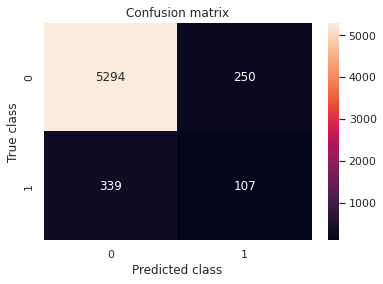

In [ ]:
#printing the confusion matrix
n_errors = (y_pred != y_test).sum()
LABELS = ['0', '1']
conf_matrix = confusion_matrix(y_test, y_pred.round())
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))

Random Forest: 5043
0.901669449081803
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5544
           1       0.30      0.24      0.27       446

    accuracy                           0.90      5990
   macro avg       0.62      0.60      0.61      5990
weighted avg       0.89      0.90      0.90      5990



<Figure size 648x504 with 0 Axes>

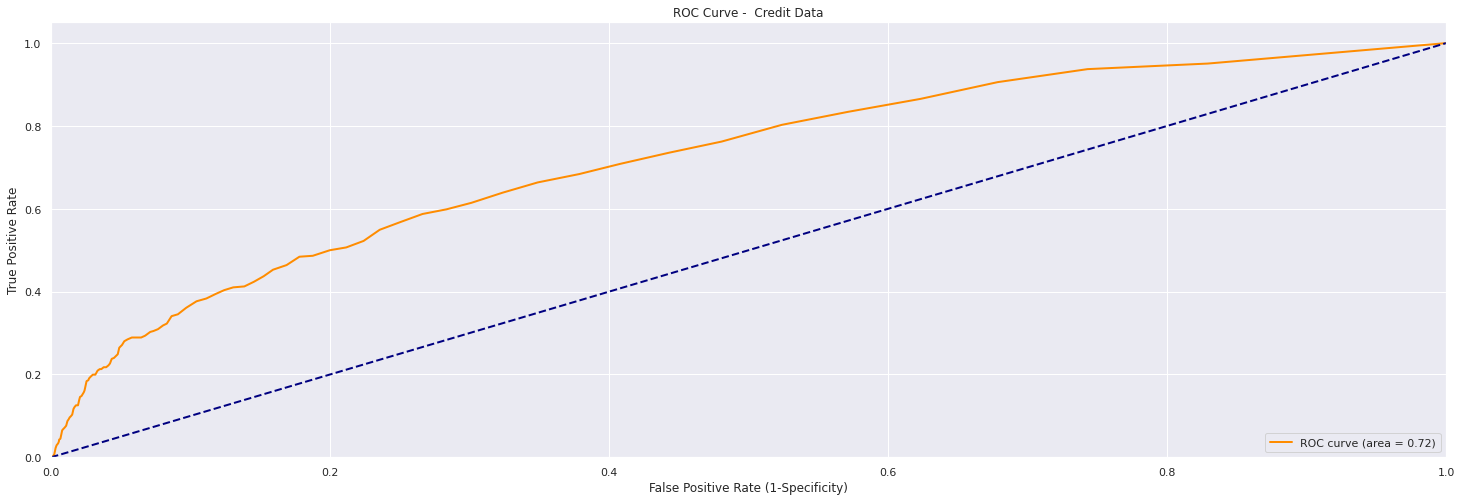

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import auc
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred, pos_label=1)
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve -  Credit Data')
plt.legend(loc="lower right")
plt.show()

In [ ]:
roc_auc

0.7214024453374228

In [ ]:
Gini=(2*roc_auc)-1
Gini


0.44280489067484563

#Final Report

  I built credit risk models with different categorical encoding techniques like LabelEncoder, TargetEncoder, WOE/Monobinning, Undersampling/Oversampling methods (Especially SMOTE, like SVMSMOTE, BorderlineSMOTE1/2, SMOTE) and different machine learning/deep learning architectures like Logistic Regression, RadomForest and Neural Networks.



**Model1:** At first model seems good because of higher accuracy, but accuracy is not what interest me, i want model to predict both good and bad flags. So first model can't predict bad cases probably because of data being imbalanced.

**Model2:** Quite like the firs model, even worse, since Model predicted all the cases as negatives-Good labels.

**Model3:** Not very good but better. Auc=65, Gini=34.5. I don't think that improvement is because of monobinning technique, it is probably oversampling method i used-SVMSMOTE. At this stage as i mentioned above, I tried multiple oversampling and undersampling techniques and even combination of them, but since best performance was with the oversampling, I decided to continue to tuning my model with SMOTE and its other techniques. I used balanced accuracy score as an accuracy metric as our data is imbalanced.

**Model4:** Here I used WOE and BorderlineSMOTE2. Auc=66, Gini=33. I think BorderlineSMOTE1 makes our model to perform better than BorderlineSMOTE2. The difference between them is that Borderline-SMOTE1 oversample both of the majority and minority classes, while Borderline-SMOTE2 only oversample the minority classes.

**Model5:** Auc=67, Gini=35. With 73 Train accuracy and 67 Test accuracy. Not very good but better.

**Model6:** Well, this one is quite chaos as it it obvious from the visual. Loss has increasing trend for the test split and the gap between train and test accuracy gets bigger which means model doesn't generelize well. Also, according to the confusion matrix model predicted all the caes as god flag. I could optimize this model but I don't think it is crucial since we can't get the coefficients from the deep learning models.

**Model7:** Auc=72, Gini=44. By looking at the confusion matrix we see that performance of this model predicting the bad cases is not good as well.


To sum up, oversampling methods helped to improve my model quite a bit. But still, overall performance is not very well. I think main cause is the small data. Data itself is imbalanced and it being small makes it much harder for the model to perform good at predicting bad cases.